#Tugas Pengganti UTS

Anggota Kelompok:
1. HAFIDZ SHIDIQ 1103210184
2. ANDIKA PRATAMA 1103210206
3. M. ANDRIAN TOPAZ FIRDAUS 1103210133


## Import Library

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Tubes Datasains/diabetes_dataset00.csv")
print("Preview Data:")
df.head()

Mounted at /content/drive
Preview Data:


Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels  Age  BMI  \
0             No               Present              40   44   38   
1             No               Present              13    1   17   
2            Yes               Present              27   36   24   
3             No               Present               8    7   16   
4            Yes               Present              17   10   17   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy  ...                  76   
1              High        Healthy  ...                  60   
2              High      Unhealthy  ...                  80   
3               Low      Unhealthy  ...                  89   
4              High        Healthy  ...                  41   

   Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
0                         No                   No         Positive   
1                        Yes                   No         Negative   
2                        Yes                   No         Negative   
3                        Yes                   No         Positive   
4                         No                   No         Positive   

  Neurological Assessments Liver Function Tests Digestive Enzyme Levels  \
0                        3               Normal                      56   
1                        1               Normal                      28   
2                        1             Abnormal                      55   
3                        2             Abnormal                      60   
4                        1               Normal                      24   

        Urine Test Birth Weight Early Onset Symptoms  
0  Ketones Present         2629                   No  
1  Glucose Present         1881                  Yes  
2  Ketones Present         3622                  Yes  
3  Ketones Present         3542                   No  
4  Protein Present         1770                   No  

[5 rows x 34 columns]

In [ ]:
print("Sample Data:")
df.sample(10)

Sample Data:


Target Genetic Markers  \
62943                                 Prediabetic        Negative   
13350                             Type 2 Diabetes        Positive   
29580                             Type 1 Diabetes        Positive   
36335  Type 3c Diabetes (Pancreatogenic Diabetes)        Negative   
63132                             Type 1 Diabetes        Positive   
34992                   Wolcott-Rallison Syndrome        Negative   
43337                                 Prediabetic        Negative   
11227                            Wolfram Syndrome        Positive   
44636     Cystic Fibrosis-Related Diabetes (CFRD)        Positive   
52629                            Wolfram Syndrome        Positive   

      Autoantibodies Family History Environmental Factors  Insulin Levels  \
62943       Negative             No               Present              11   
13350       Negative            Yes                Absent              37   
29580       Negative            Yes                Absent              13   
36335       Positive             No               Present              41   
63132       Positive             No               Present               8   
34992       Positive             No               Present              16   
43337       Positive             No                Absent              19   
11227       Positive            Yes               Present              11   
44636       Positive            Yes                Absent              29   
52629       Negative            Yes               Present              15   

       Age  BMI Physical Activity Dietary Habits  ...  Pulmonary Function  \
62943   41   28               Low        Healthy  ...                  84   
13350   59   27               Low        Healthy  ...                  74   
29580    9   18               Low      Unhealthy  ...                  88   
36335   56   32          Moderate        Healthy  ...                  65   
63132   21   22          Moderate        Healthy  ...                  85   
34992    7   24               Low        Healthy  ...                  56   
43337   37   28          Moderate      Unhealthy  ...                  87   
11227    6   17               Low      Unhealthy  ...                  35   
44636   15   25          Moderate        Healthy  ...                  80   
52629    8   21              High      Unhealthy  ...                  32   

       Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
62943                        Yes                   No         Negative   
13350                         No                  Yes         Positive   
29580                        Yes                   No         Positive   
36335                        Yes                  Yes         Positive   
63132                        Yes                  Yes         Negative   
34992                        Yes                  Yes         Negative   
43337                        Yes                  Yes         Positive   
11227                         No                  Yes         Positive   
44636                         No                   No         Positive   
52629                         No                  Yes         Negative   

      Neurological Assessments Liver Function Tests Digestive Enzyme Levels  \
62943                        1             Abnormal                      67   
13350                        2               Normal                      70   
29580                        2             Abnormal                      69   
36335                        3             Abnormal                      57   
63132                        1               Normal                      43   
34992                        1               Normal                      24   
43337                        2               Normal                      78   
11227                        2             Abnormal                      16   
44636                        2             Abnormal          

## Exploratory Data Analysis (EDA)

### Informasi Data

In [ ]:
print("Info tentang data seperti tipe data, jumlah data non-null, dll. :\n")
df.info()

Info tentang data seperti tipe data, jumlah data non-null, dll. :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64

In [ ]:
#mengecek apakah ada missing value pada dataset
df.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessments         0
Liver Function Tests             0
Digestive Enzyme Levels          0
Urine Test                       0
Birth Weight                     0
Early Onset Symptoms             0
dtype: int64

In [ ]:
#mengecek apakah ada data yang terduplikat
df.duplicated().sum()

0

### Statistik Deskriptif Data Numerik

In [ ]:
print("Statistik Deskriptif :")
df.describe()

Statistik Deskriptif :


Insulin Levels           Age           BMI  Blood Pressure  \
count    70000.000000  70000.000000  70000.000000    70000.000000   
mean        21.607443     32.020700     24.782943      111.339543   
std         10.785852     21.043173      6.014236       19.945000   
min          5.000000      0.000000     12.000000       60.000000   
25%         13.000000     14.000000     20.000000       99.000000   
50%         19.000000     31.000000     25.000000      113.000000   
75%         28.000000     49.000000     29.000000      125.000000   
max         49.000000     79.000000     39.000000      149.000000   

       Cholesterol Levels  Waist Circumference  Blood Glucose Levels  \
count        70000.000000         70000.000000          70000.000000   
mean           194.867200            35.051657            160.701657   
std             44.532466             6.803461             48.165547   
min            100.000000            20.000000             80.000000   
25%            163.000000            30.000000            121.000000   
50%            191.000000            34.000000            152.000000   
75%            225.000000            39.000000            194.000000   
max            299.000000            54.000000            299.000000   

       Weight Gain During Pregnancy  Pancreatic Health  Pulmonary Function  \
count                  70000.000000       70000.000000        70000.000000   
mean                      15.496414          47.564243           70.264671   
std                        9.633096          19.984683           11.965600   
min                        0.000000          10.000000           30.000000   
25%                        7.000000          32.000000           63.000000   
50%                       16.000000          46.000000           72.000000   
75%                       22.000000          64.000000           79.000000   
max                       39.000000          99.000000           89.000000   

       Neurological Assessments  Digestive Enzyme Levels  Birth Weight  
count              70000.000000             70000.000000  70000.000000  
mean                   1.804157                46.420529   3097.061071  
std                    0.680154                19.391089    713.837300  
min                    1.000000                10.000000   1500.000000  
25%                    1.000000                31.000000   2629.000000  
50%                    2.000000                48.000000   3103.000000  
75%                    2.000000                61.000000   3656.250000  
max                    3.000000                99.000000   4499.000000

### Analisis Korelasi Data Numerik

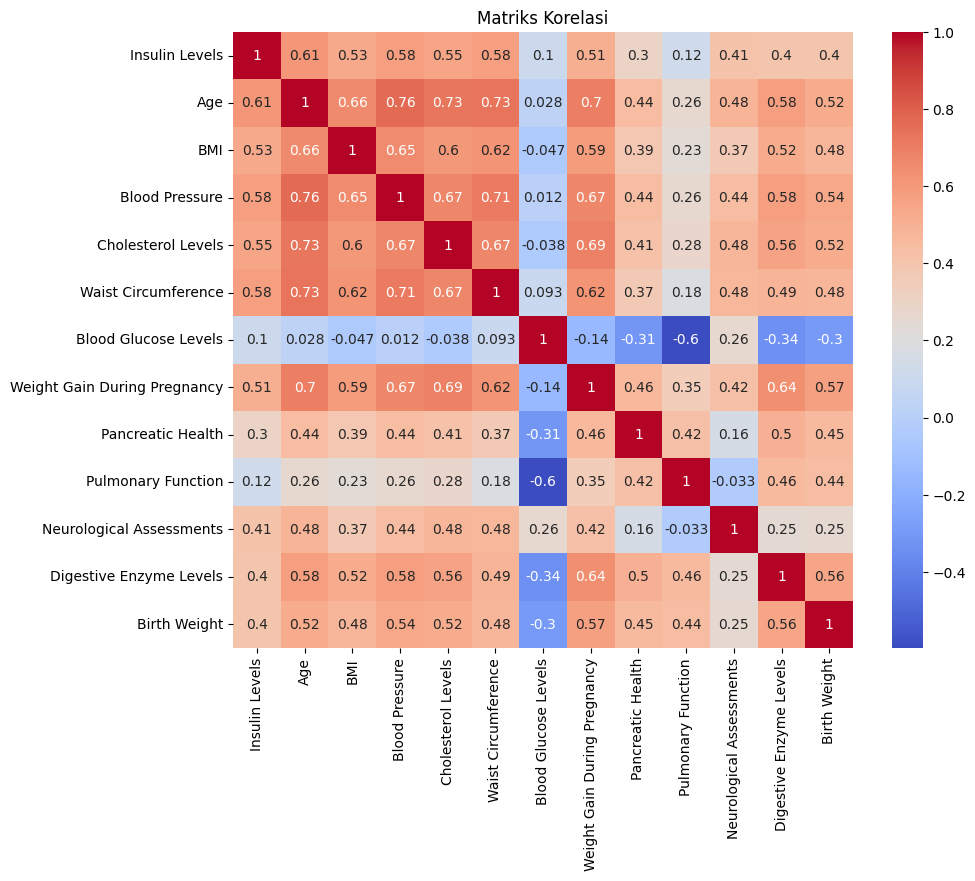

In [ ]:
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

### Visualisasi Data


In [ ]:
#Pembagian Tipe data
df_kategorikal = df.select_dtypes(include=['object'])
df_kategorikal = pd.concat([df_kategorikal, df[['Urine Test', 'Smoking Status', 'Alcohol Consumption']]], axis=1)

df_numerik = df.drop(columns=['Age','Waist Circumference', 'Glucose Tolerance Test', 'Pancreatic Health', 'Pulmonary Function','Birth Weight','Digestive Enzyme Levels','Neurological Assessments','Weight Gain During Pregnancy']).select_dtypes(include=['int', 'float'])

#### Pie Chart


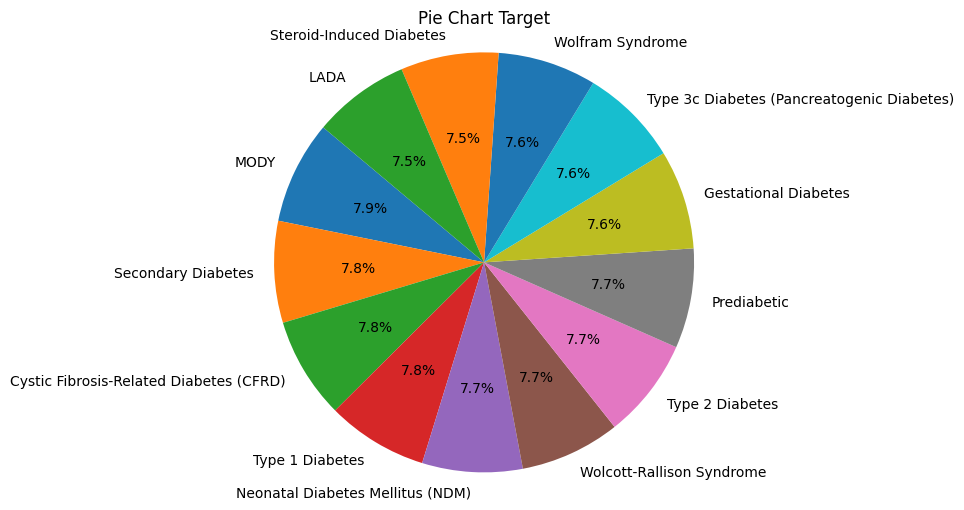

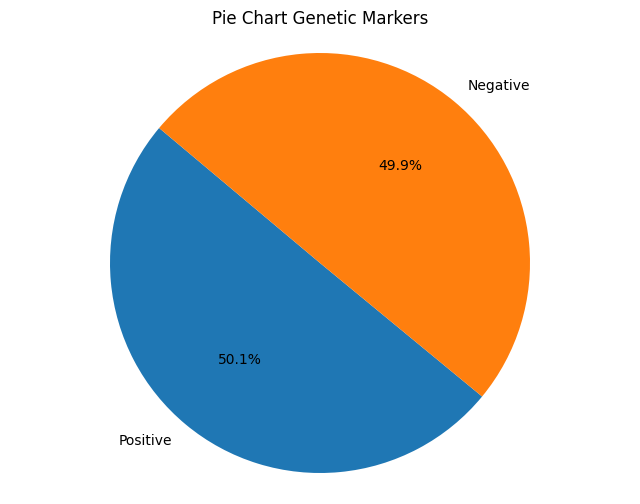

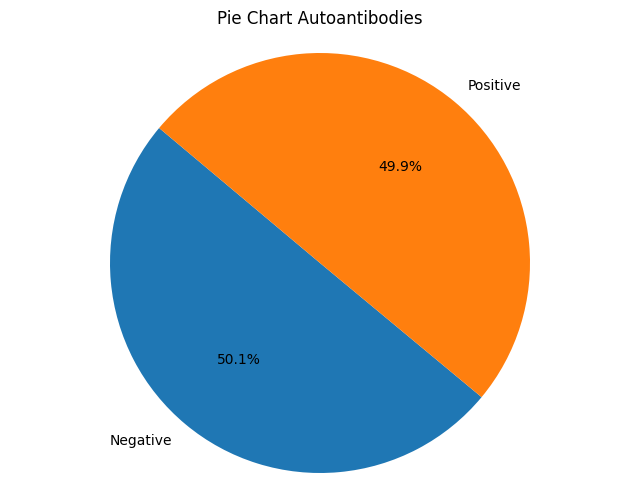

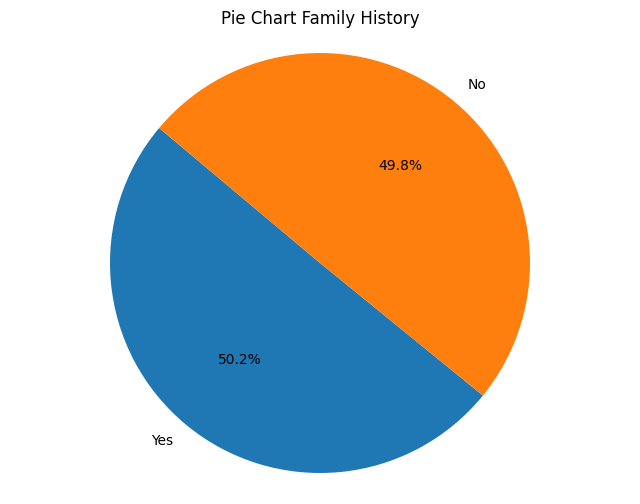

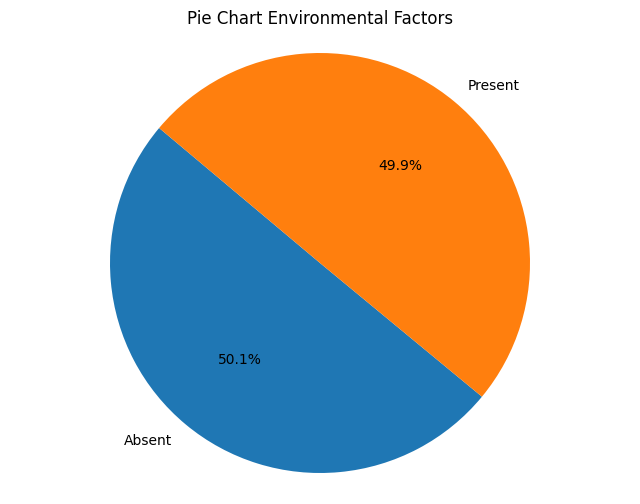

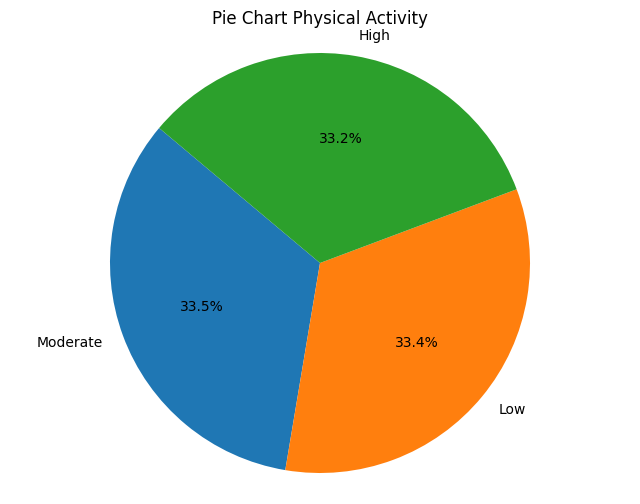

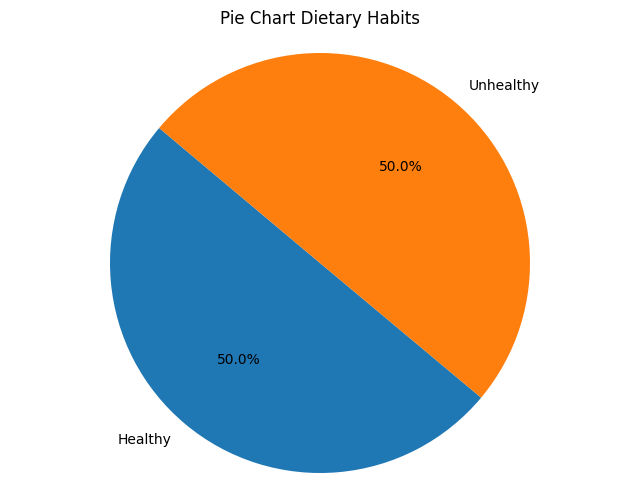

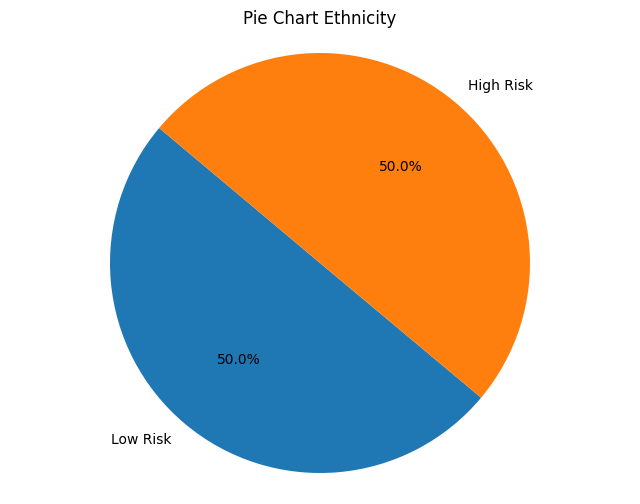

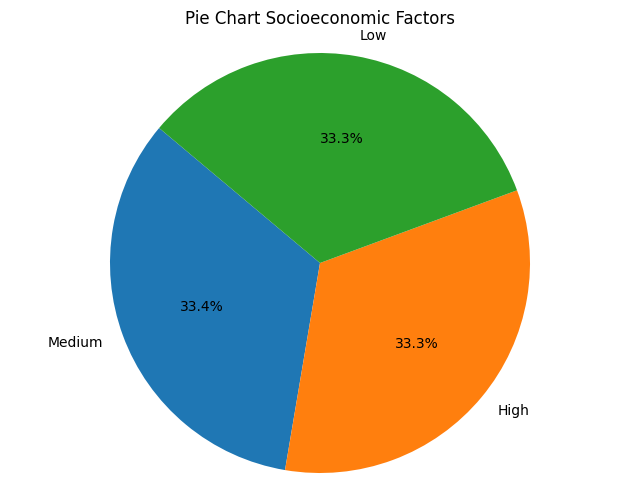

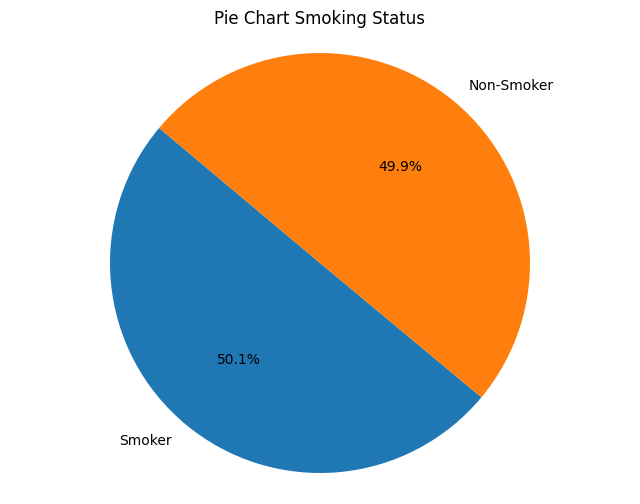

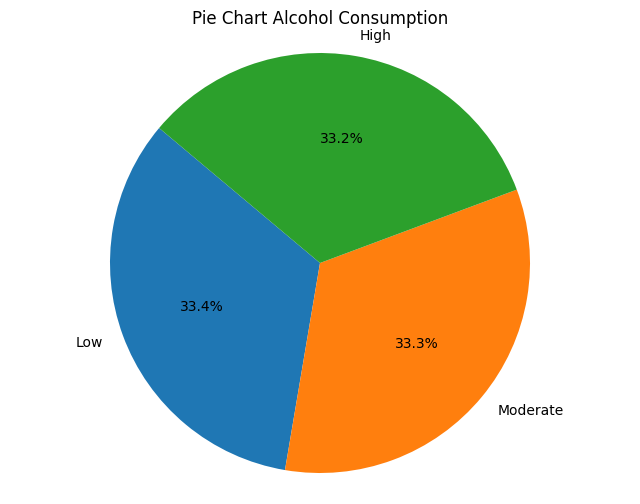

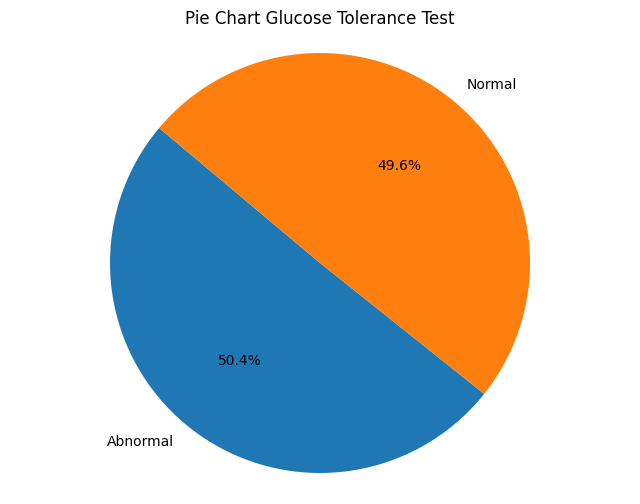

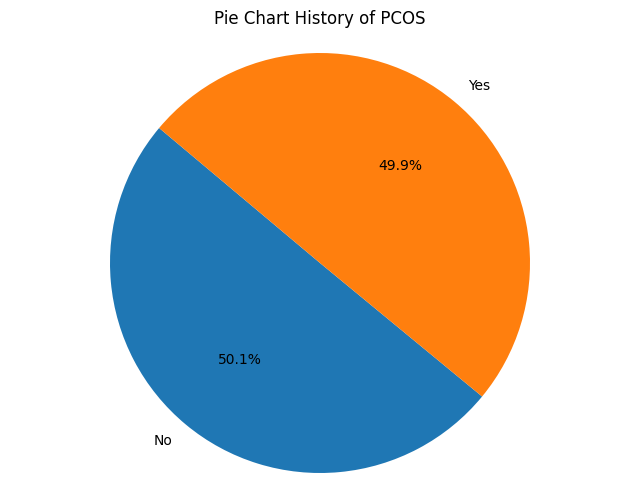

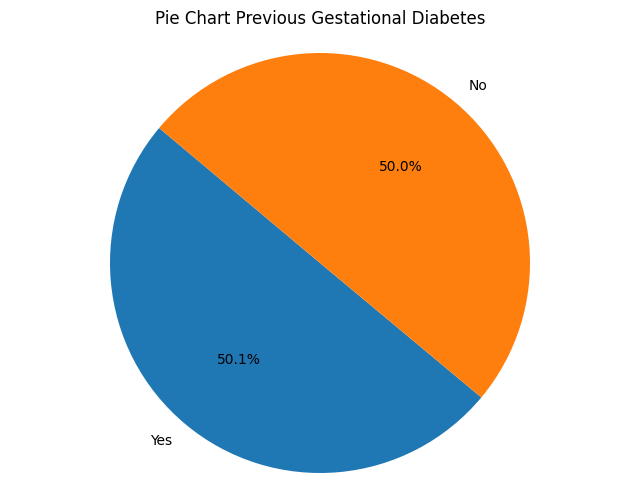

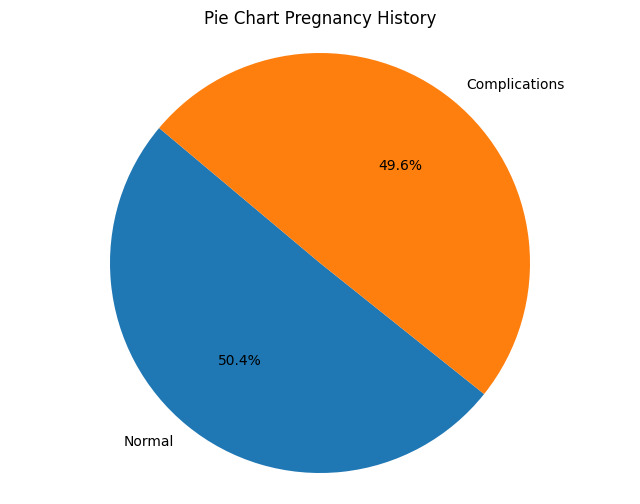

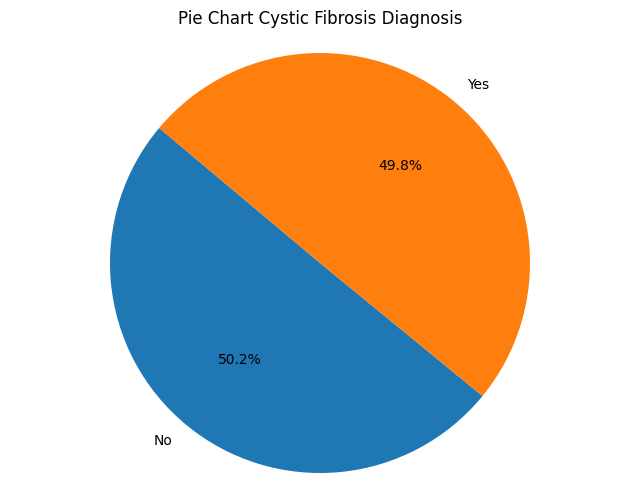

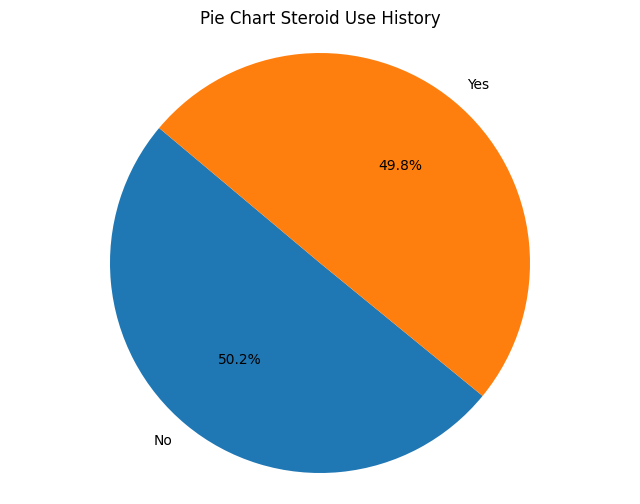

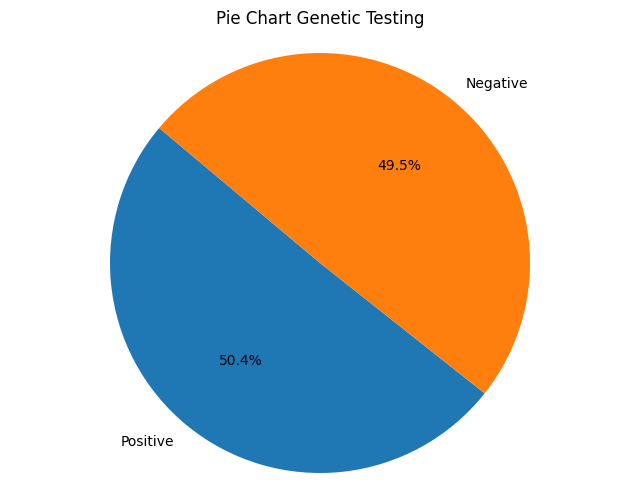

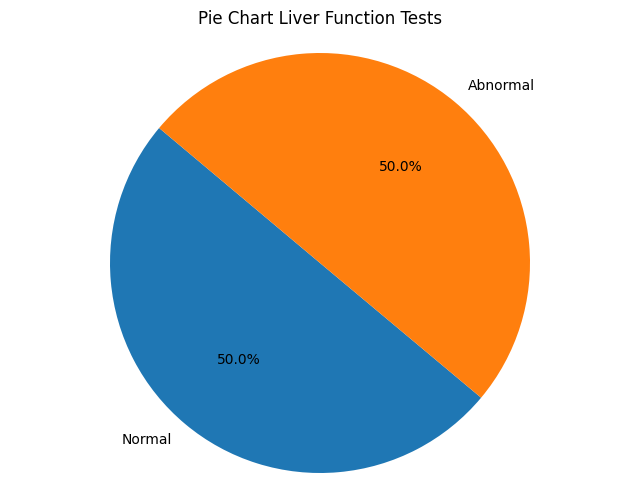

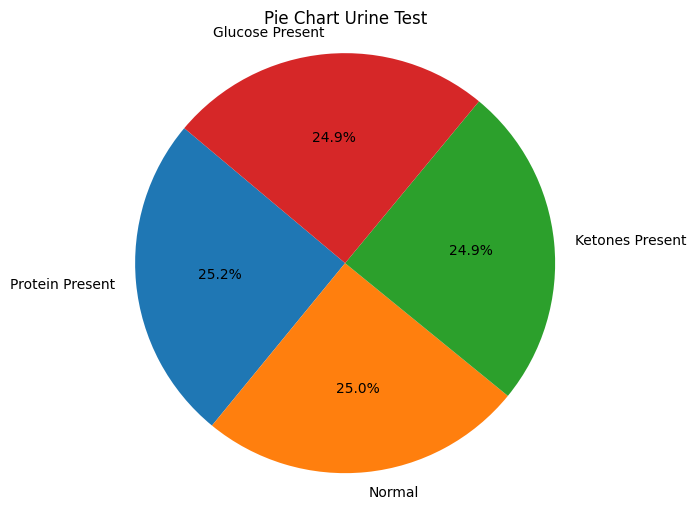

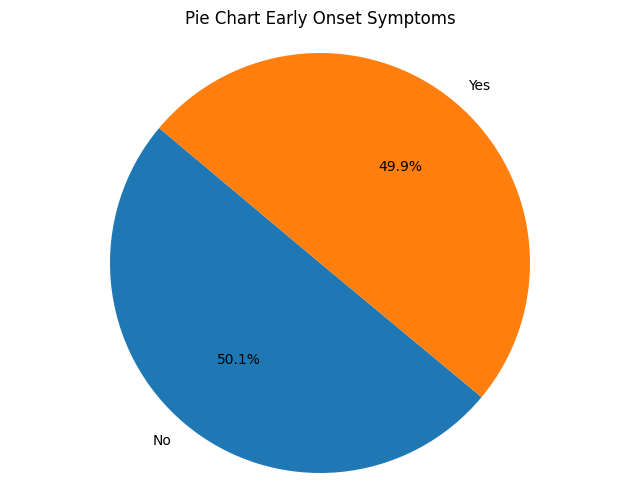

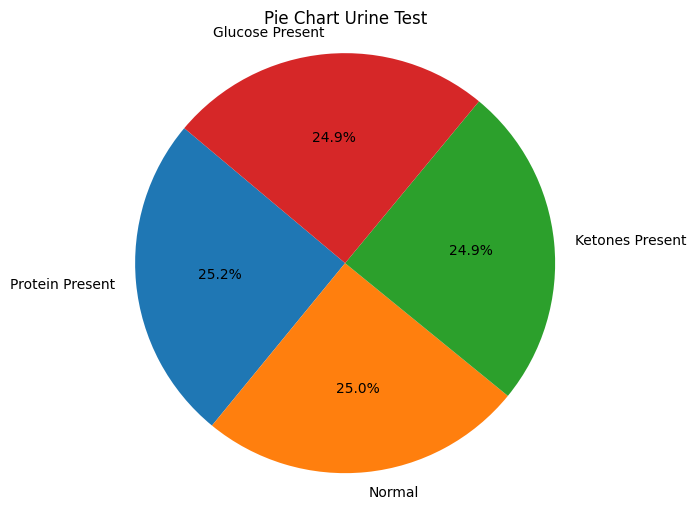

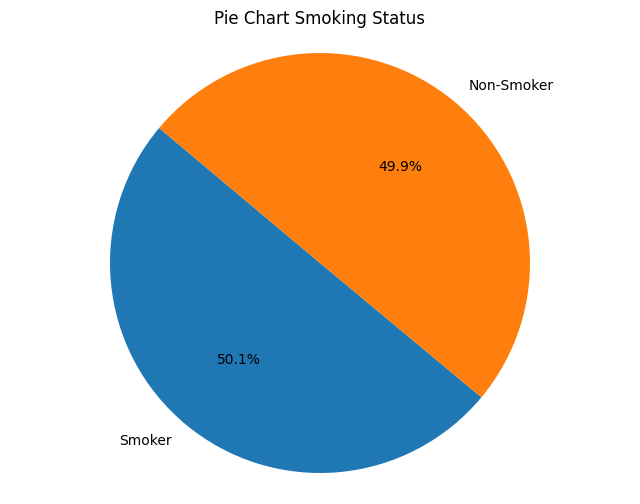

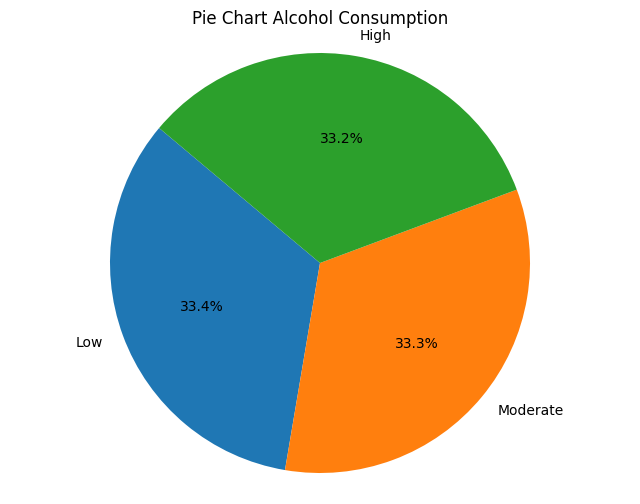

In [ ]:
for column in df_kategorikal.columns:
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart {column}')
    plt.axis('equal')  # Agar pie chart menjadi lingkaran
    plt.show()

#### Bar Chart

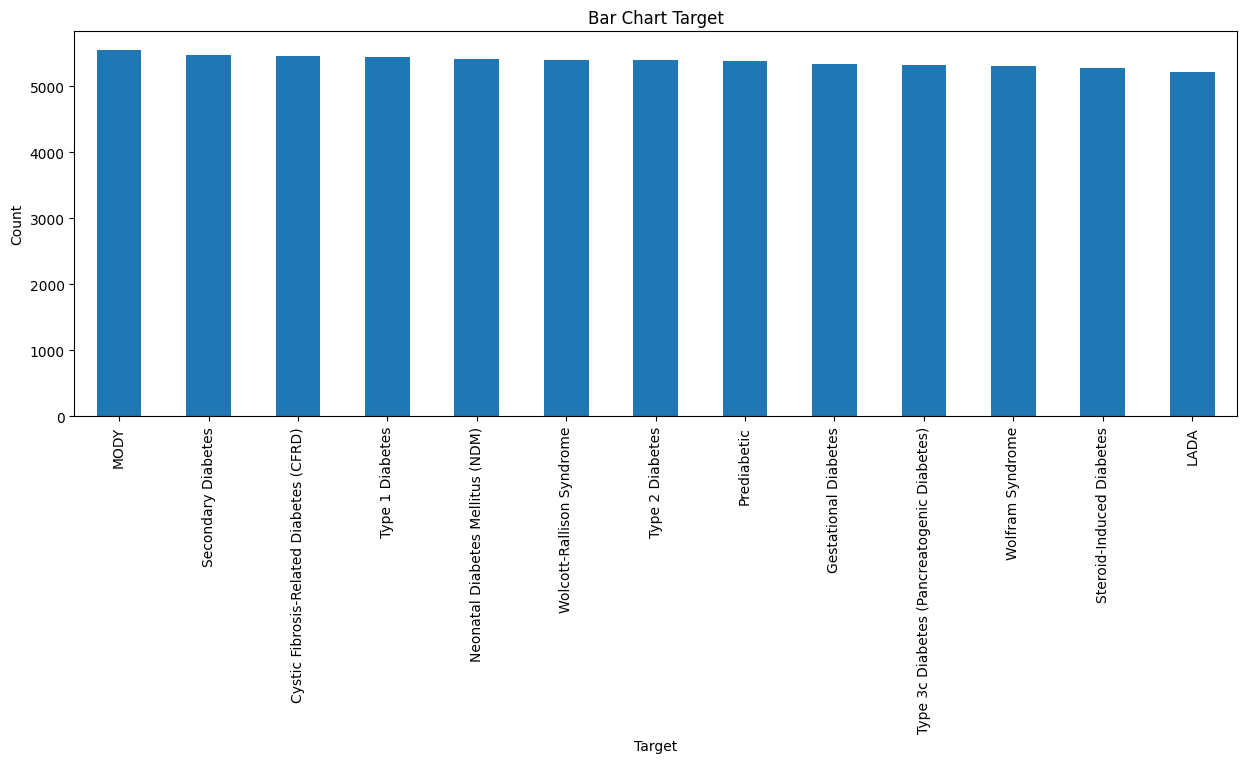

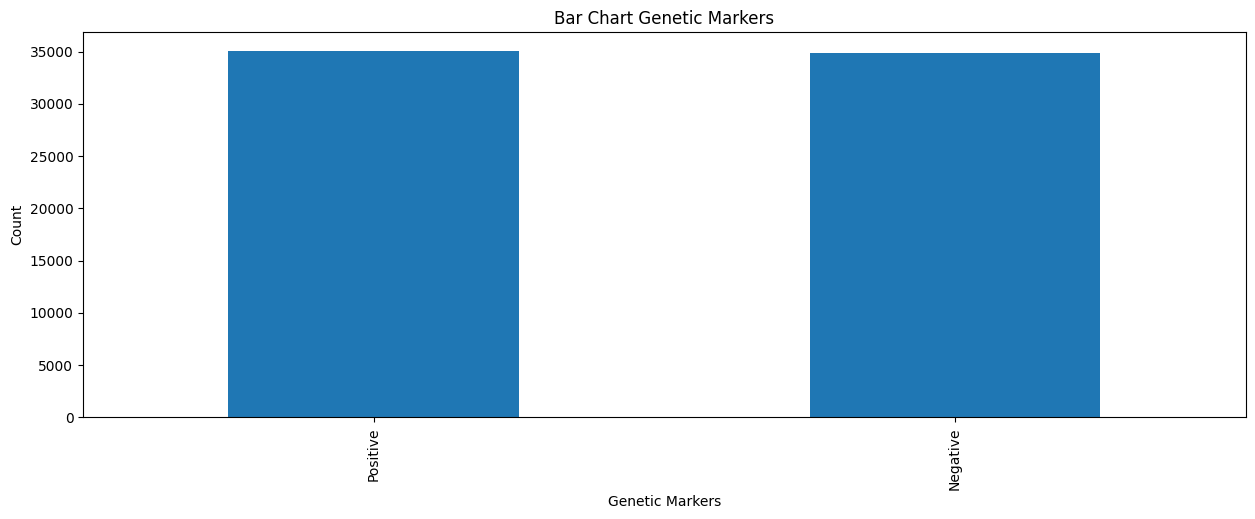

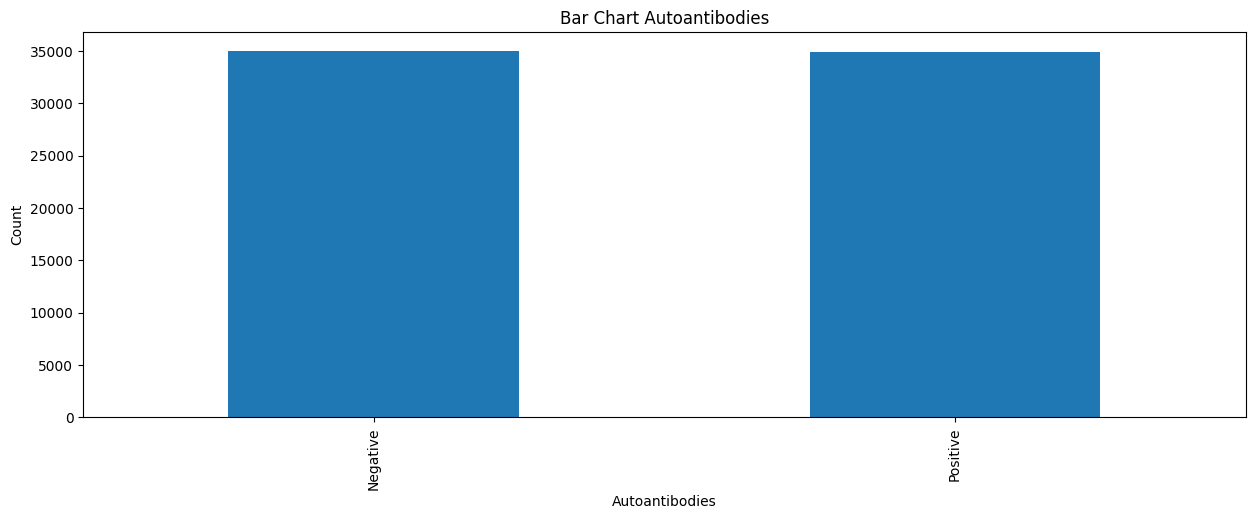

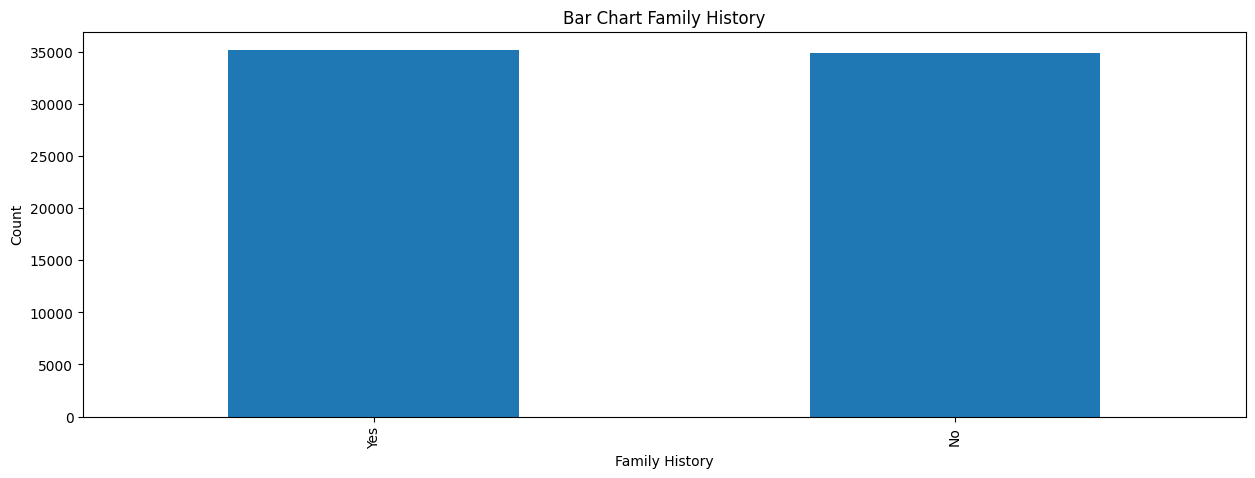

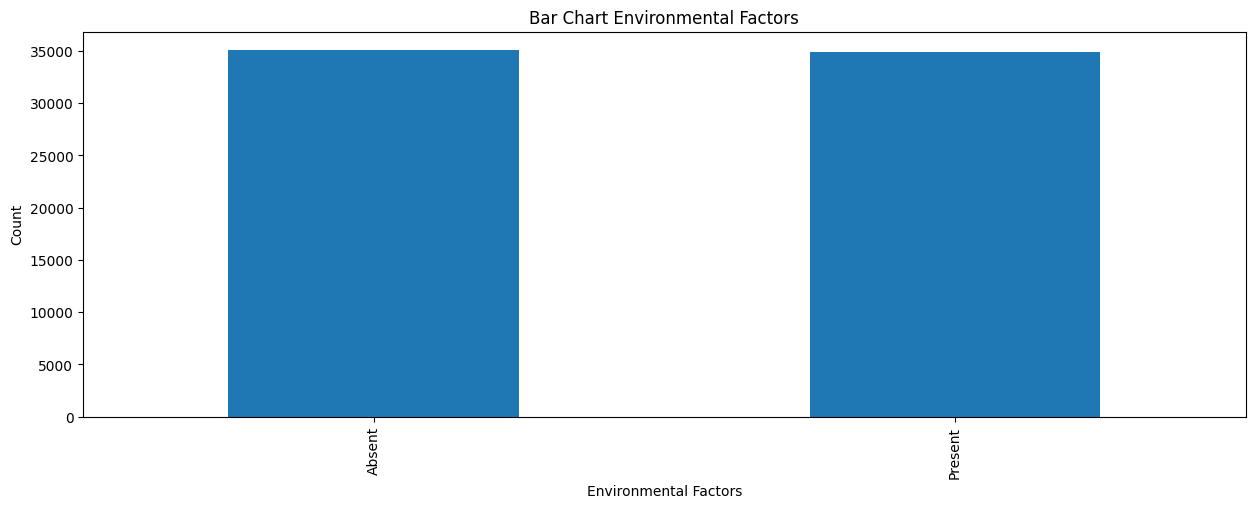

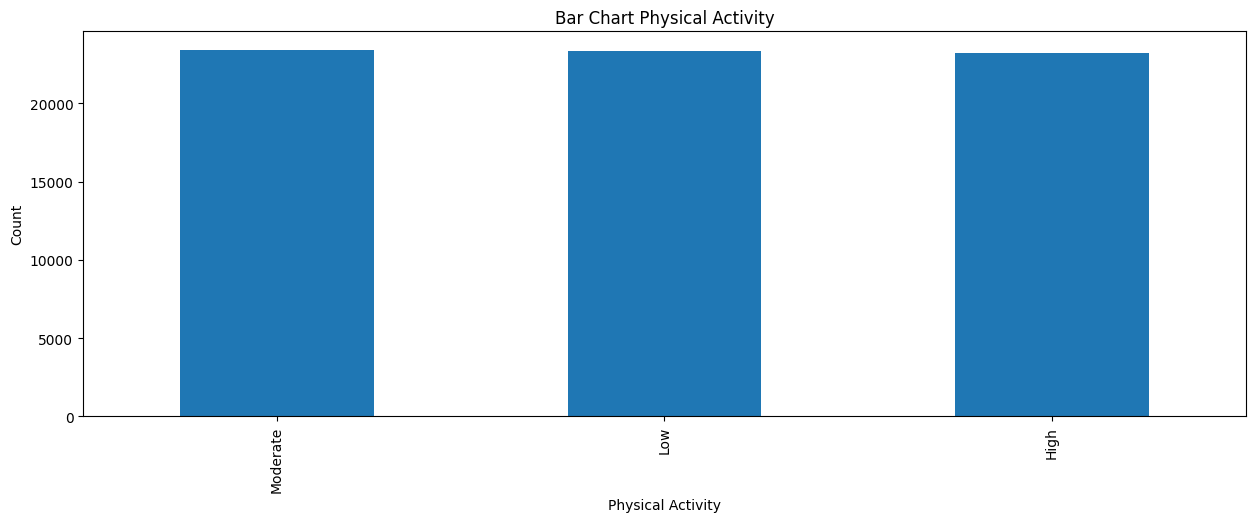

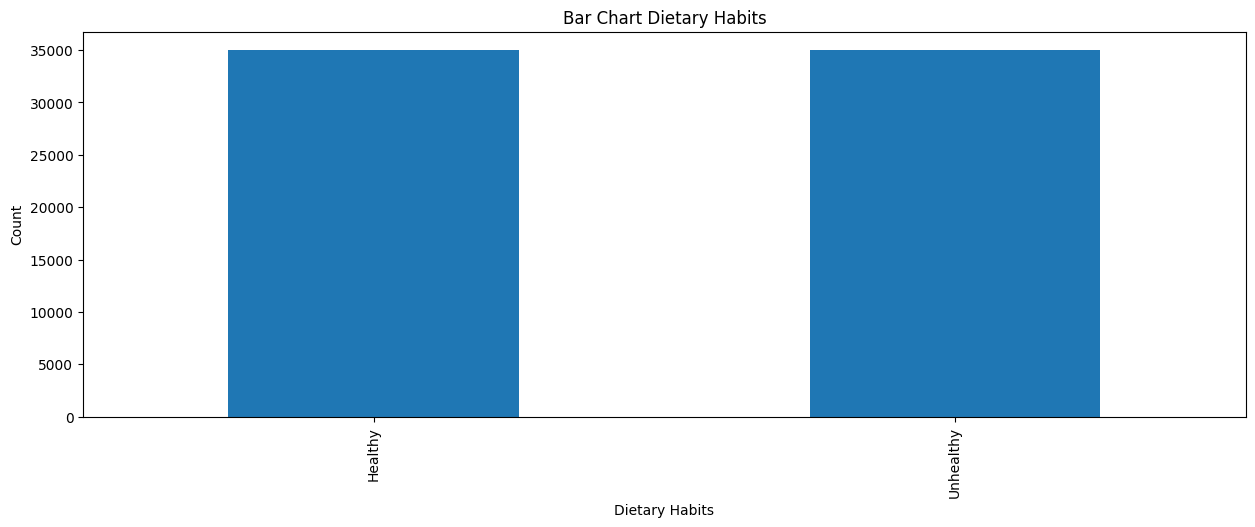

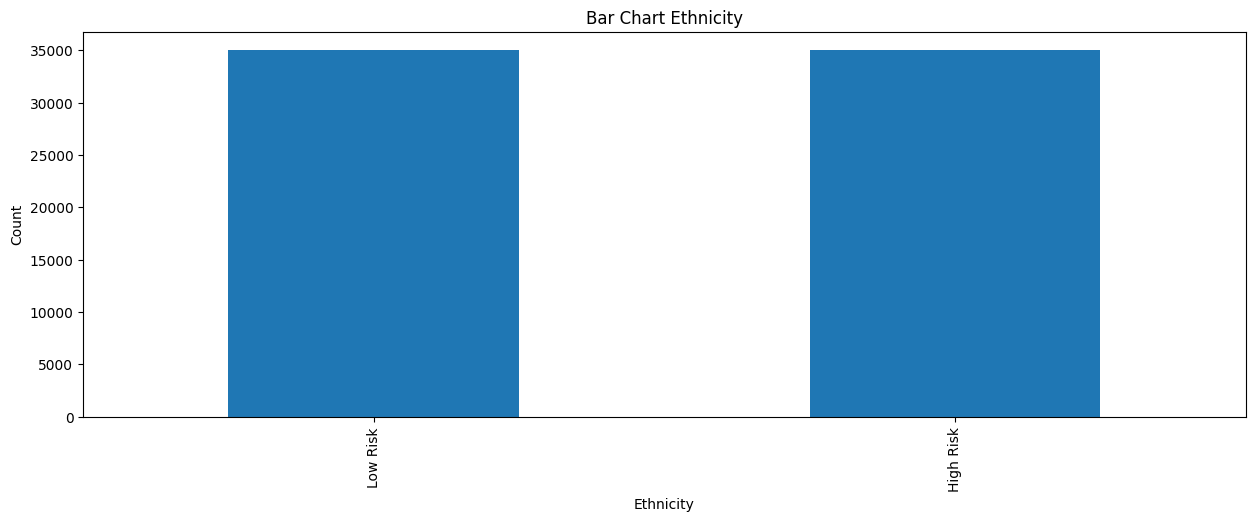

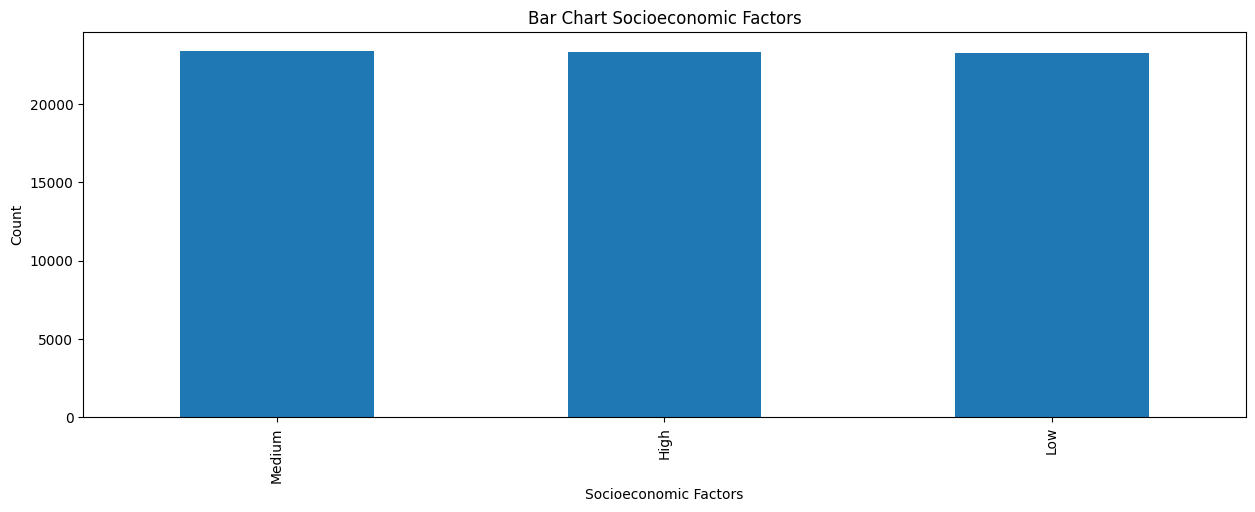

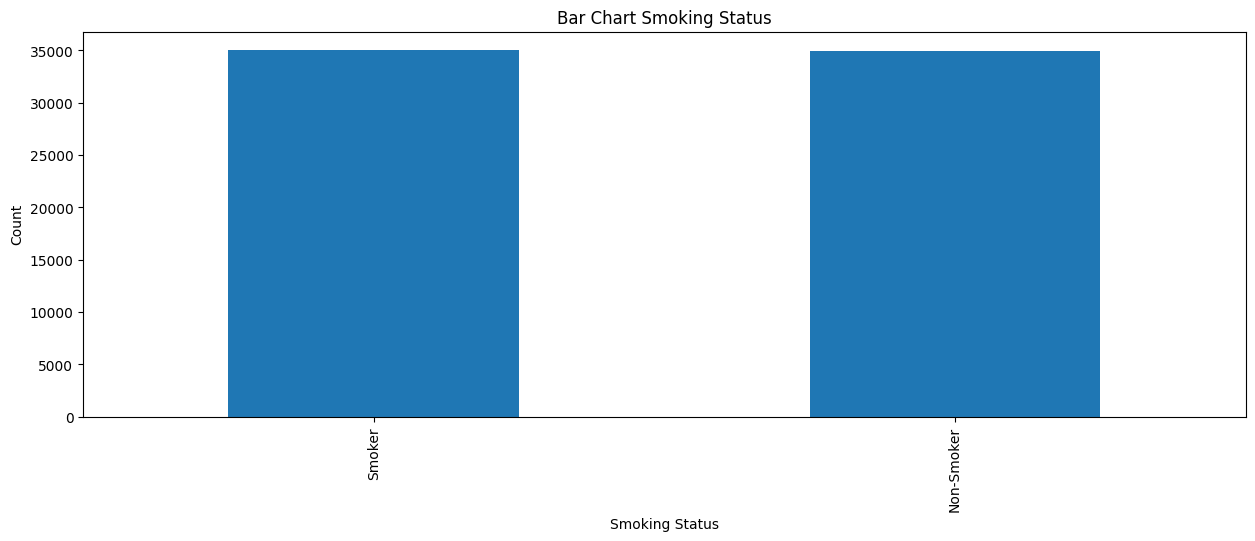

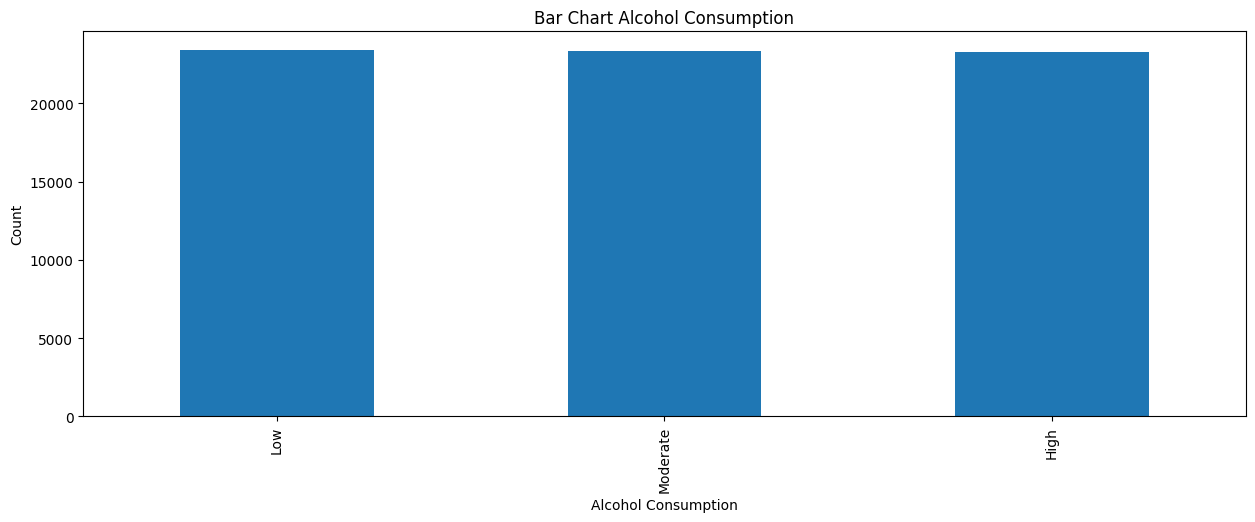

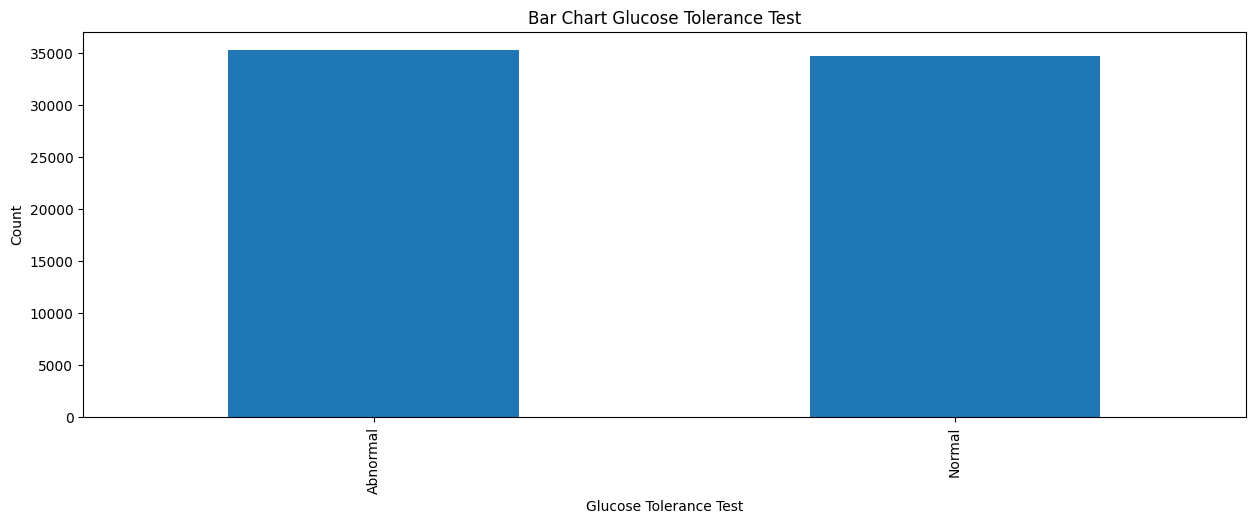

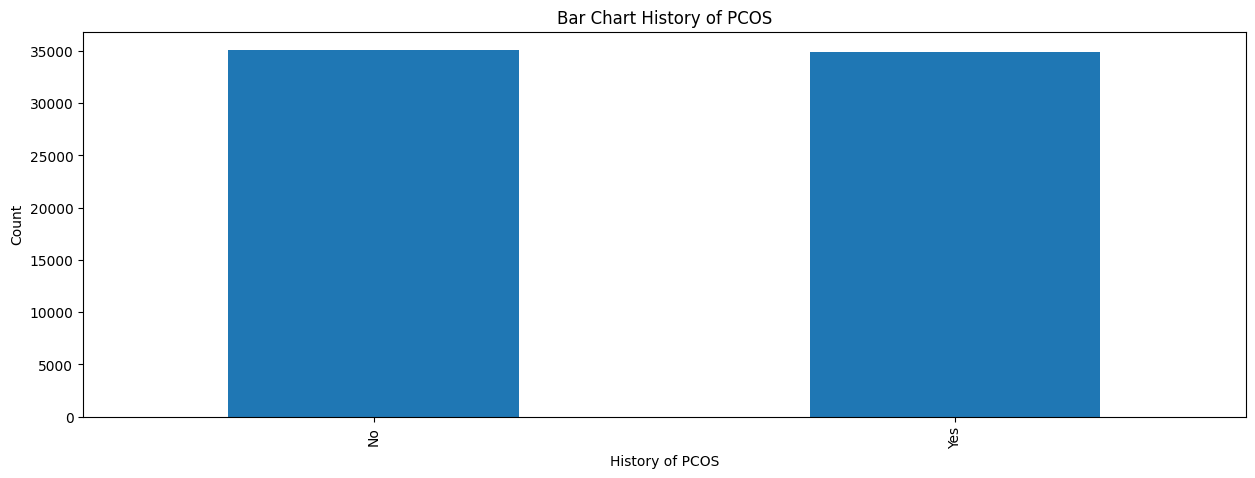

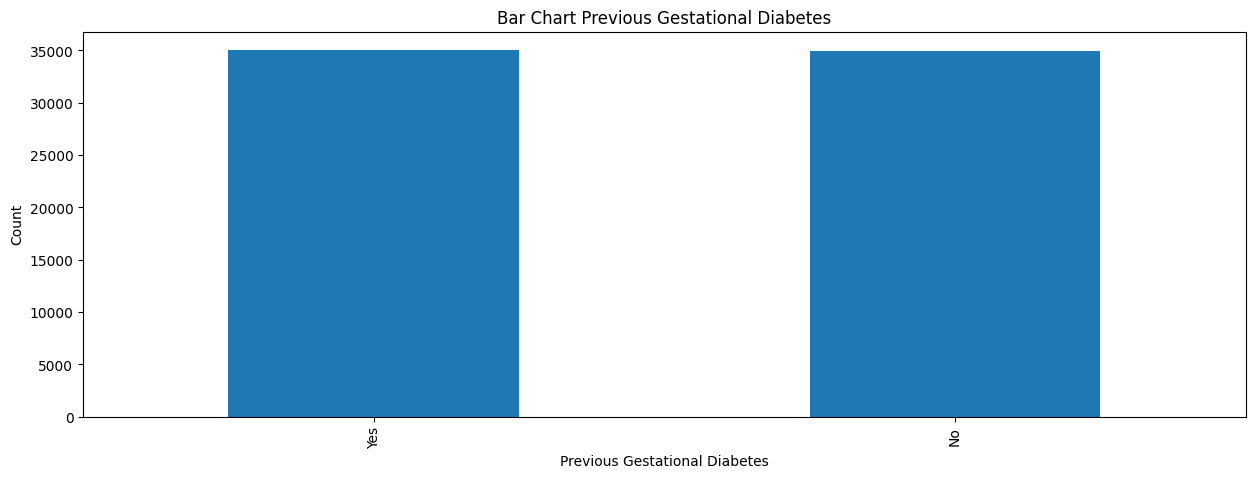

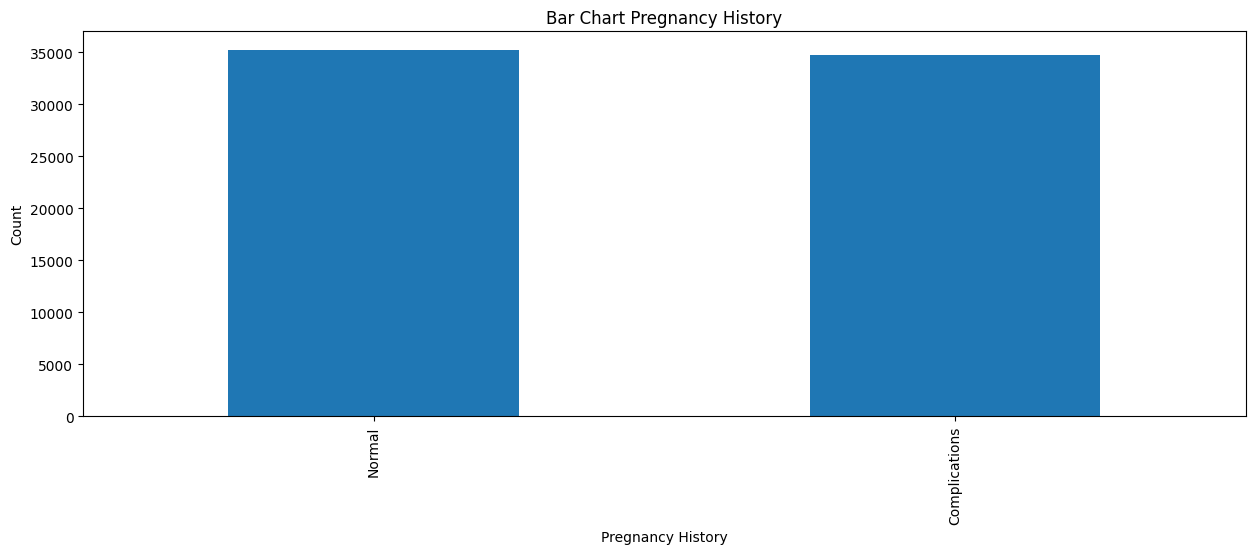

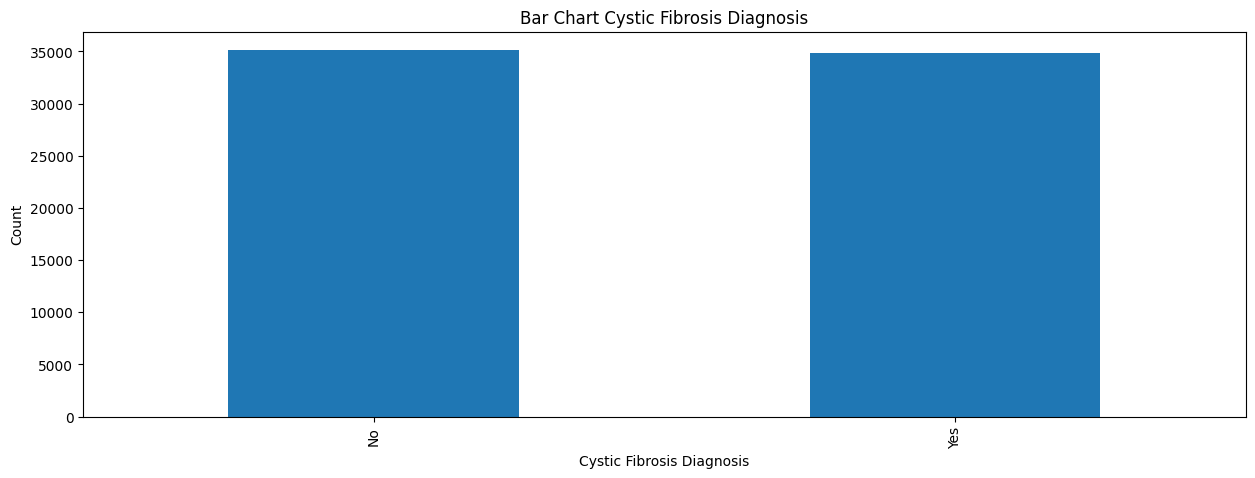

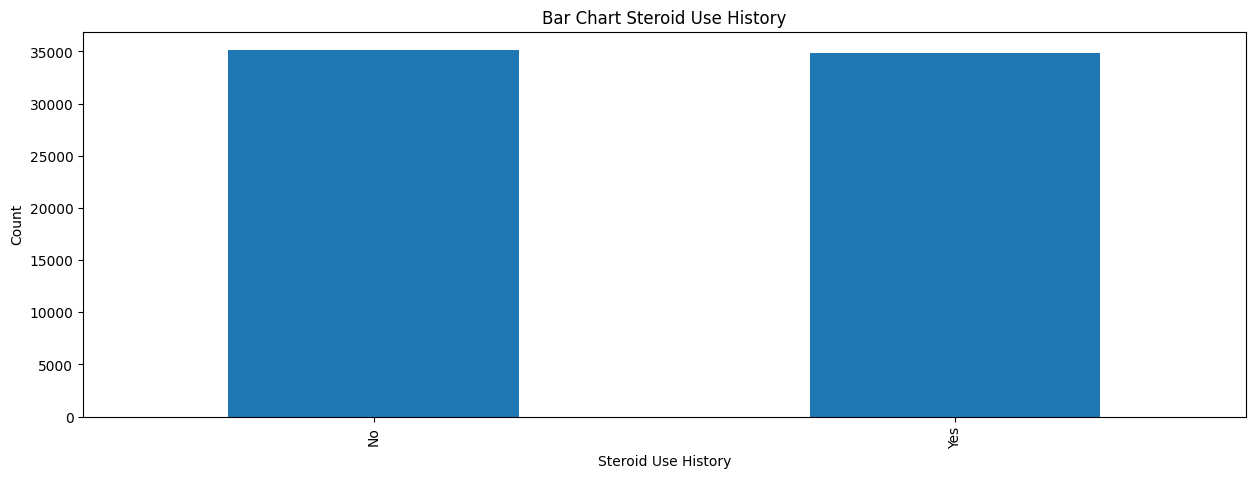

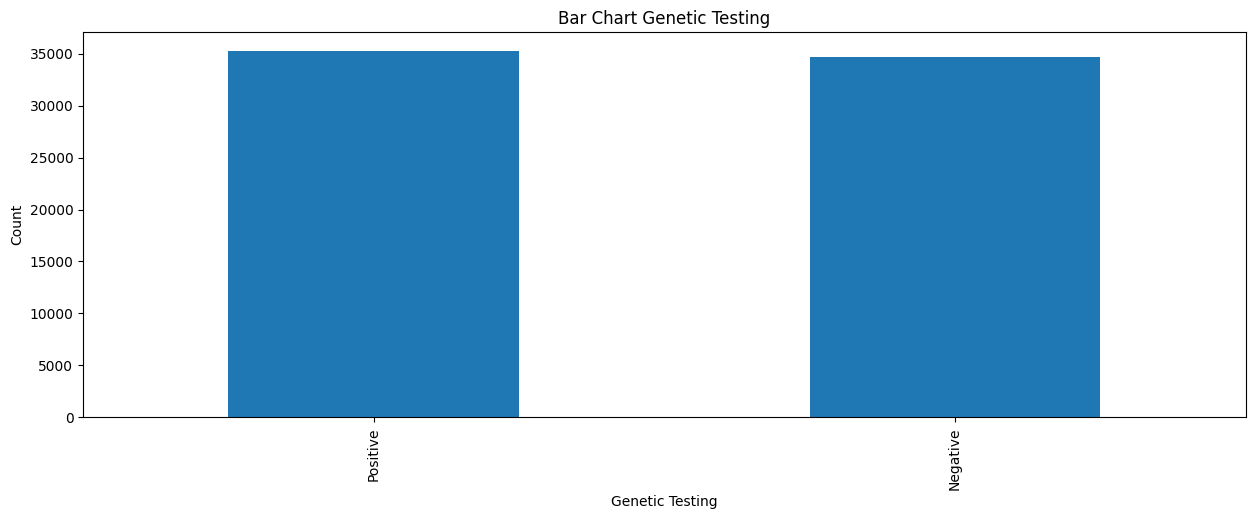

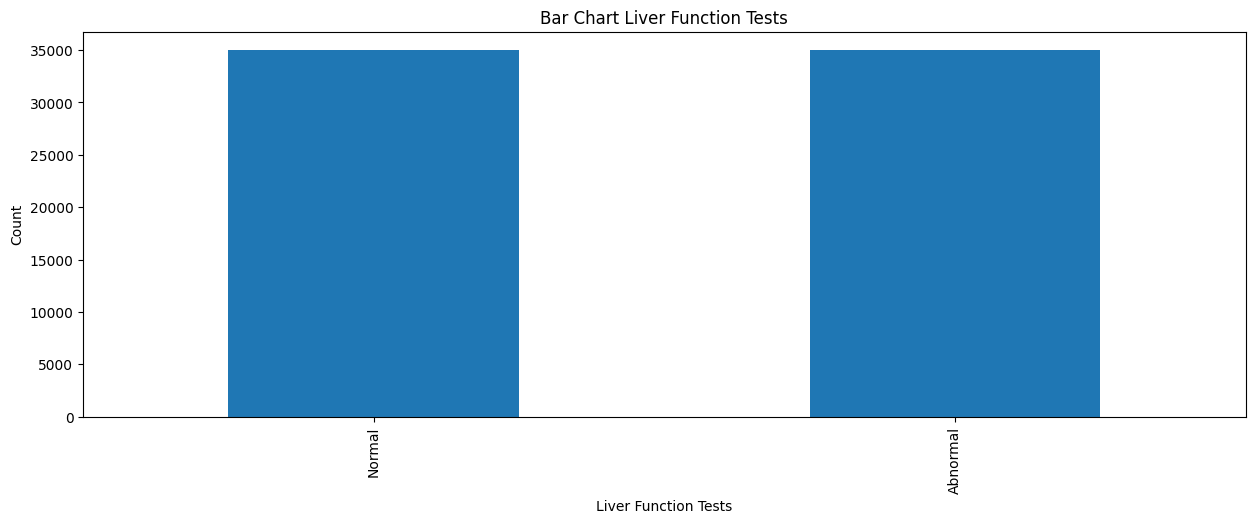

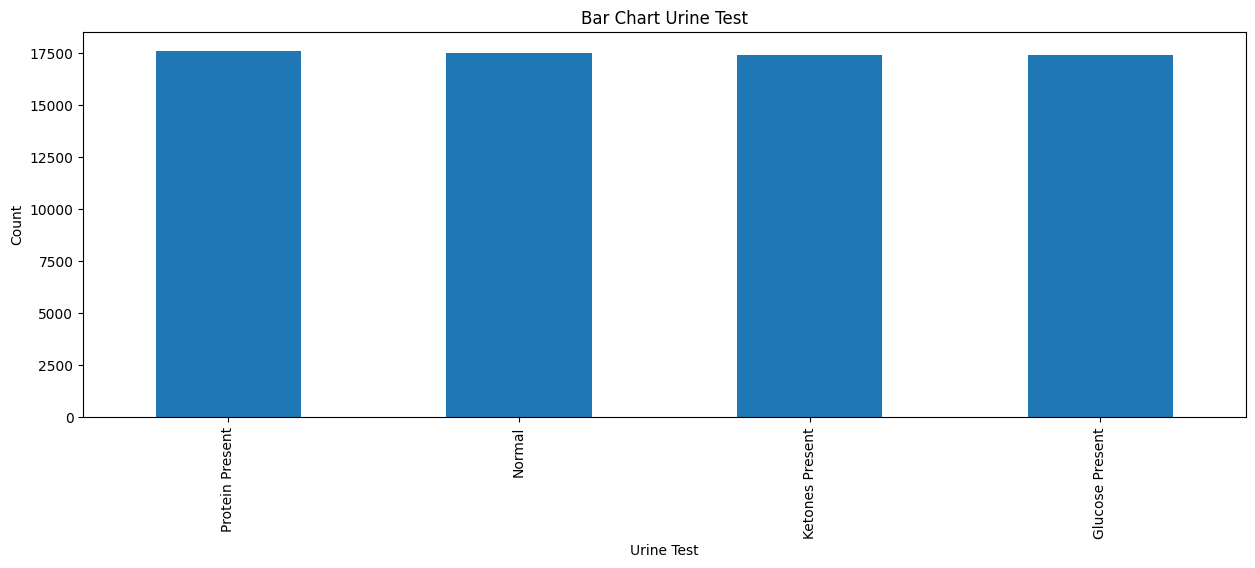

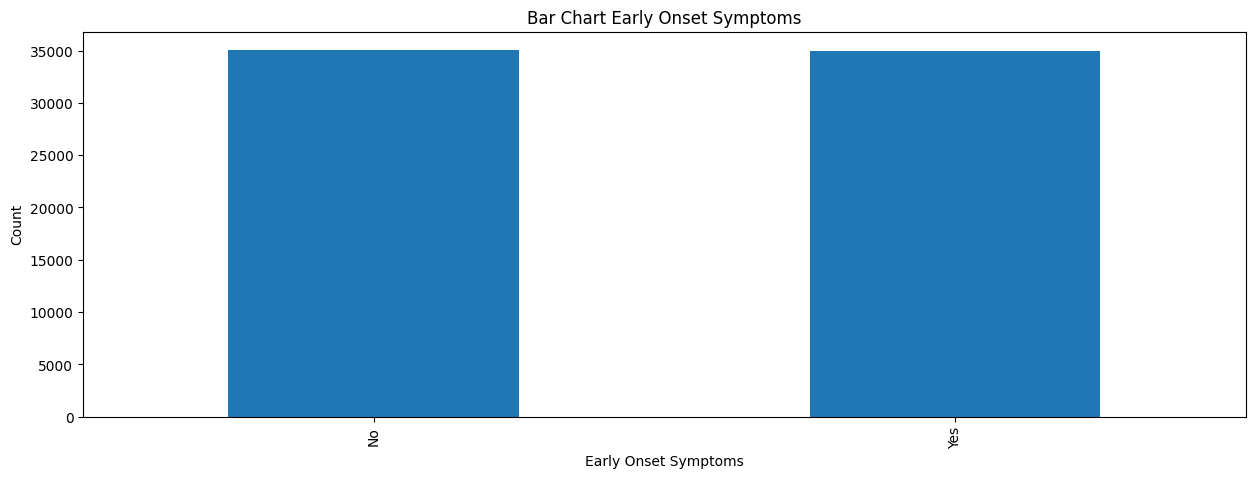

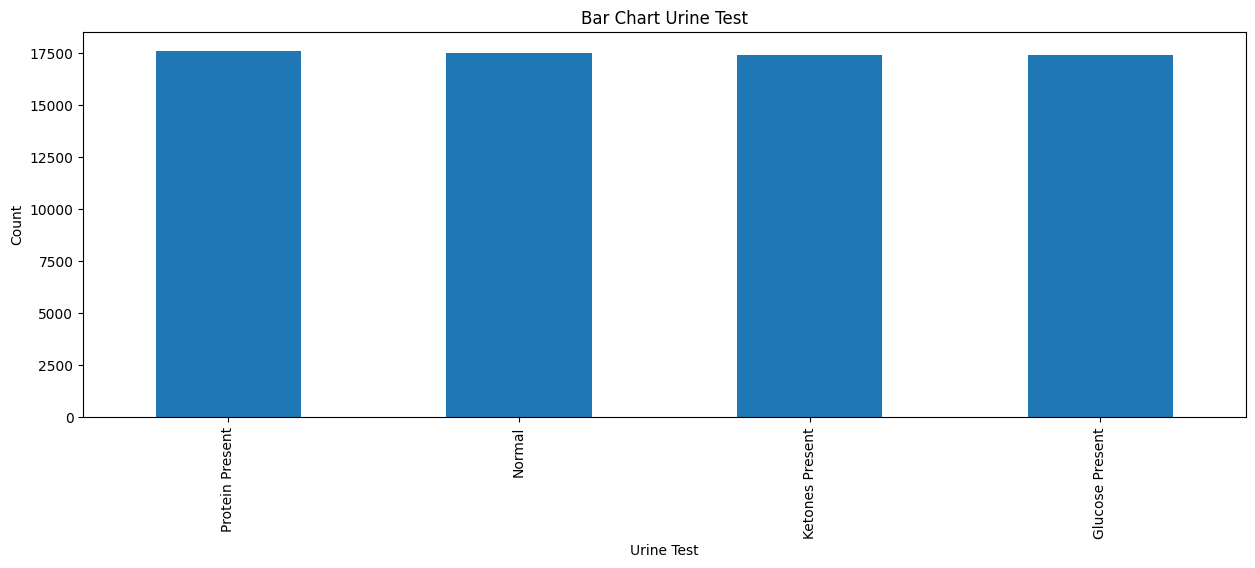

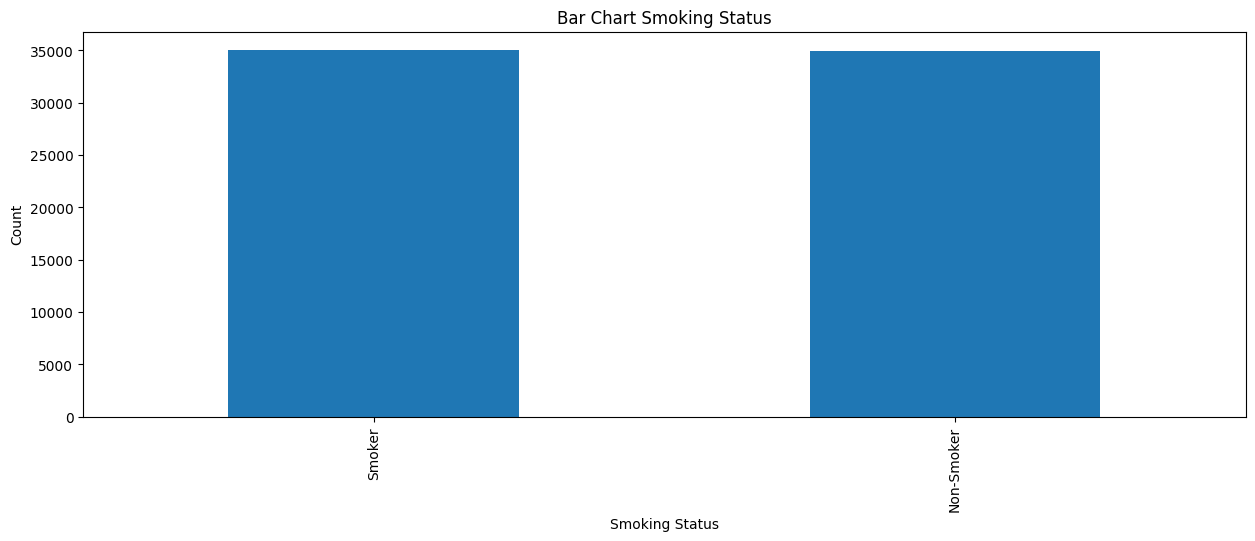

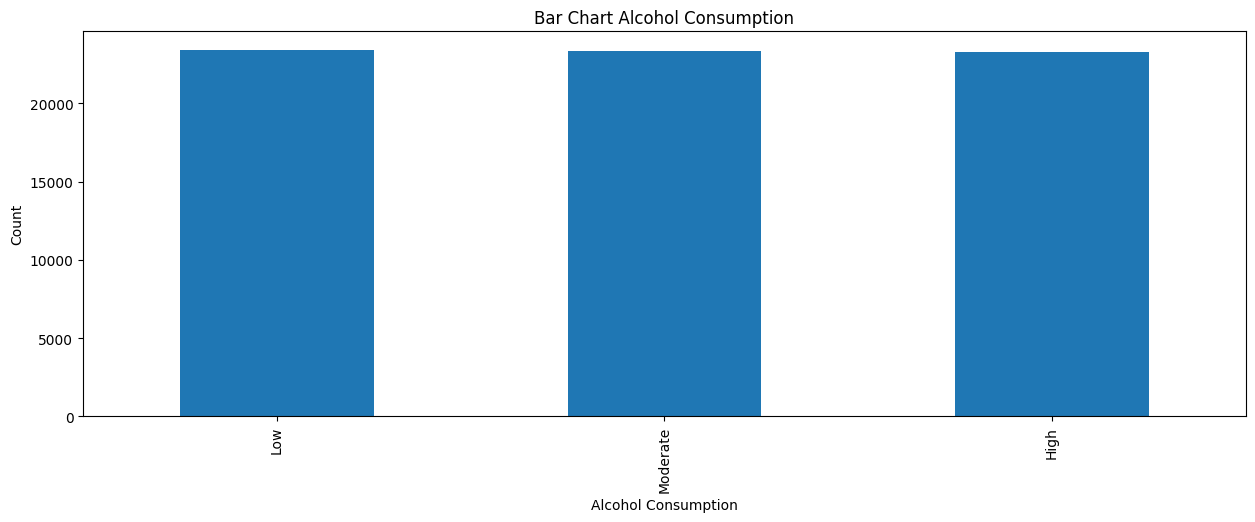

In [ ]:
for column in df_kategorikal.columns:
    counts = df[column].value_counts()
    plt.figure(figsize=(15, 5))
    counts.plot(kind='bar')
    plt.title(f'Bar Chart {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

#### Line Graph

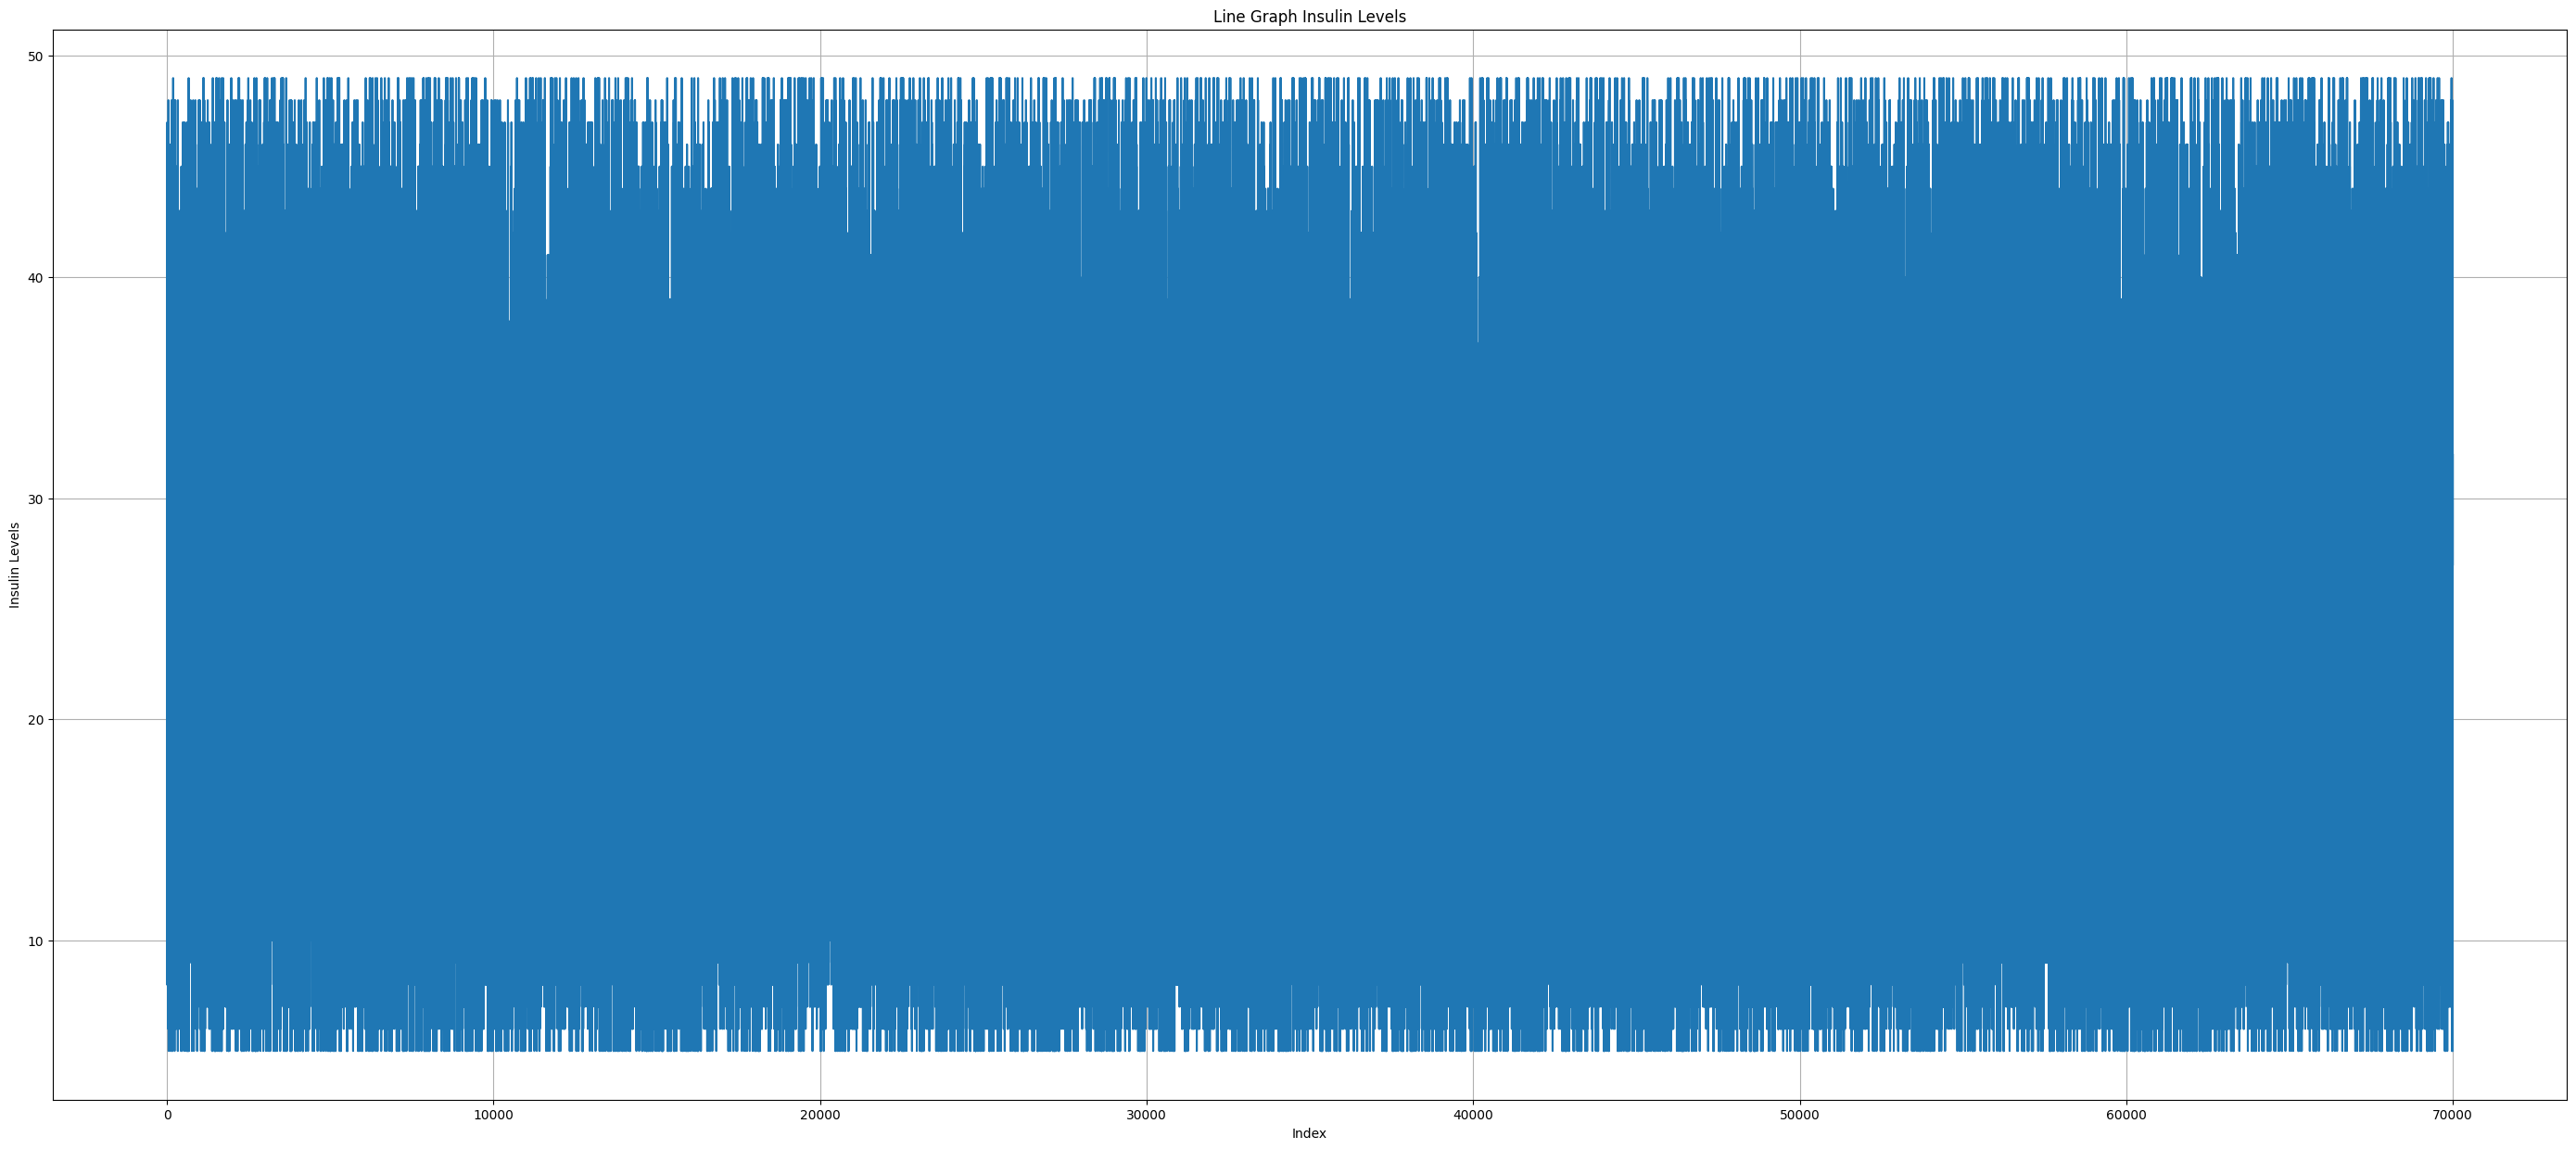

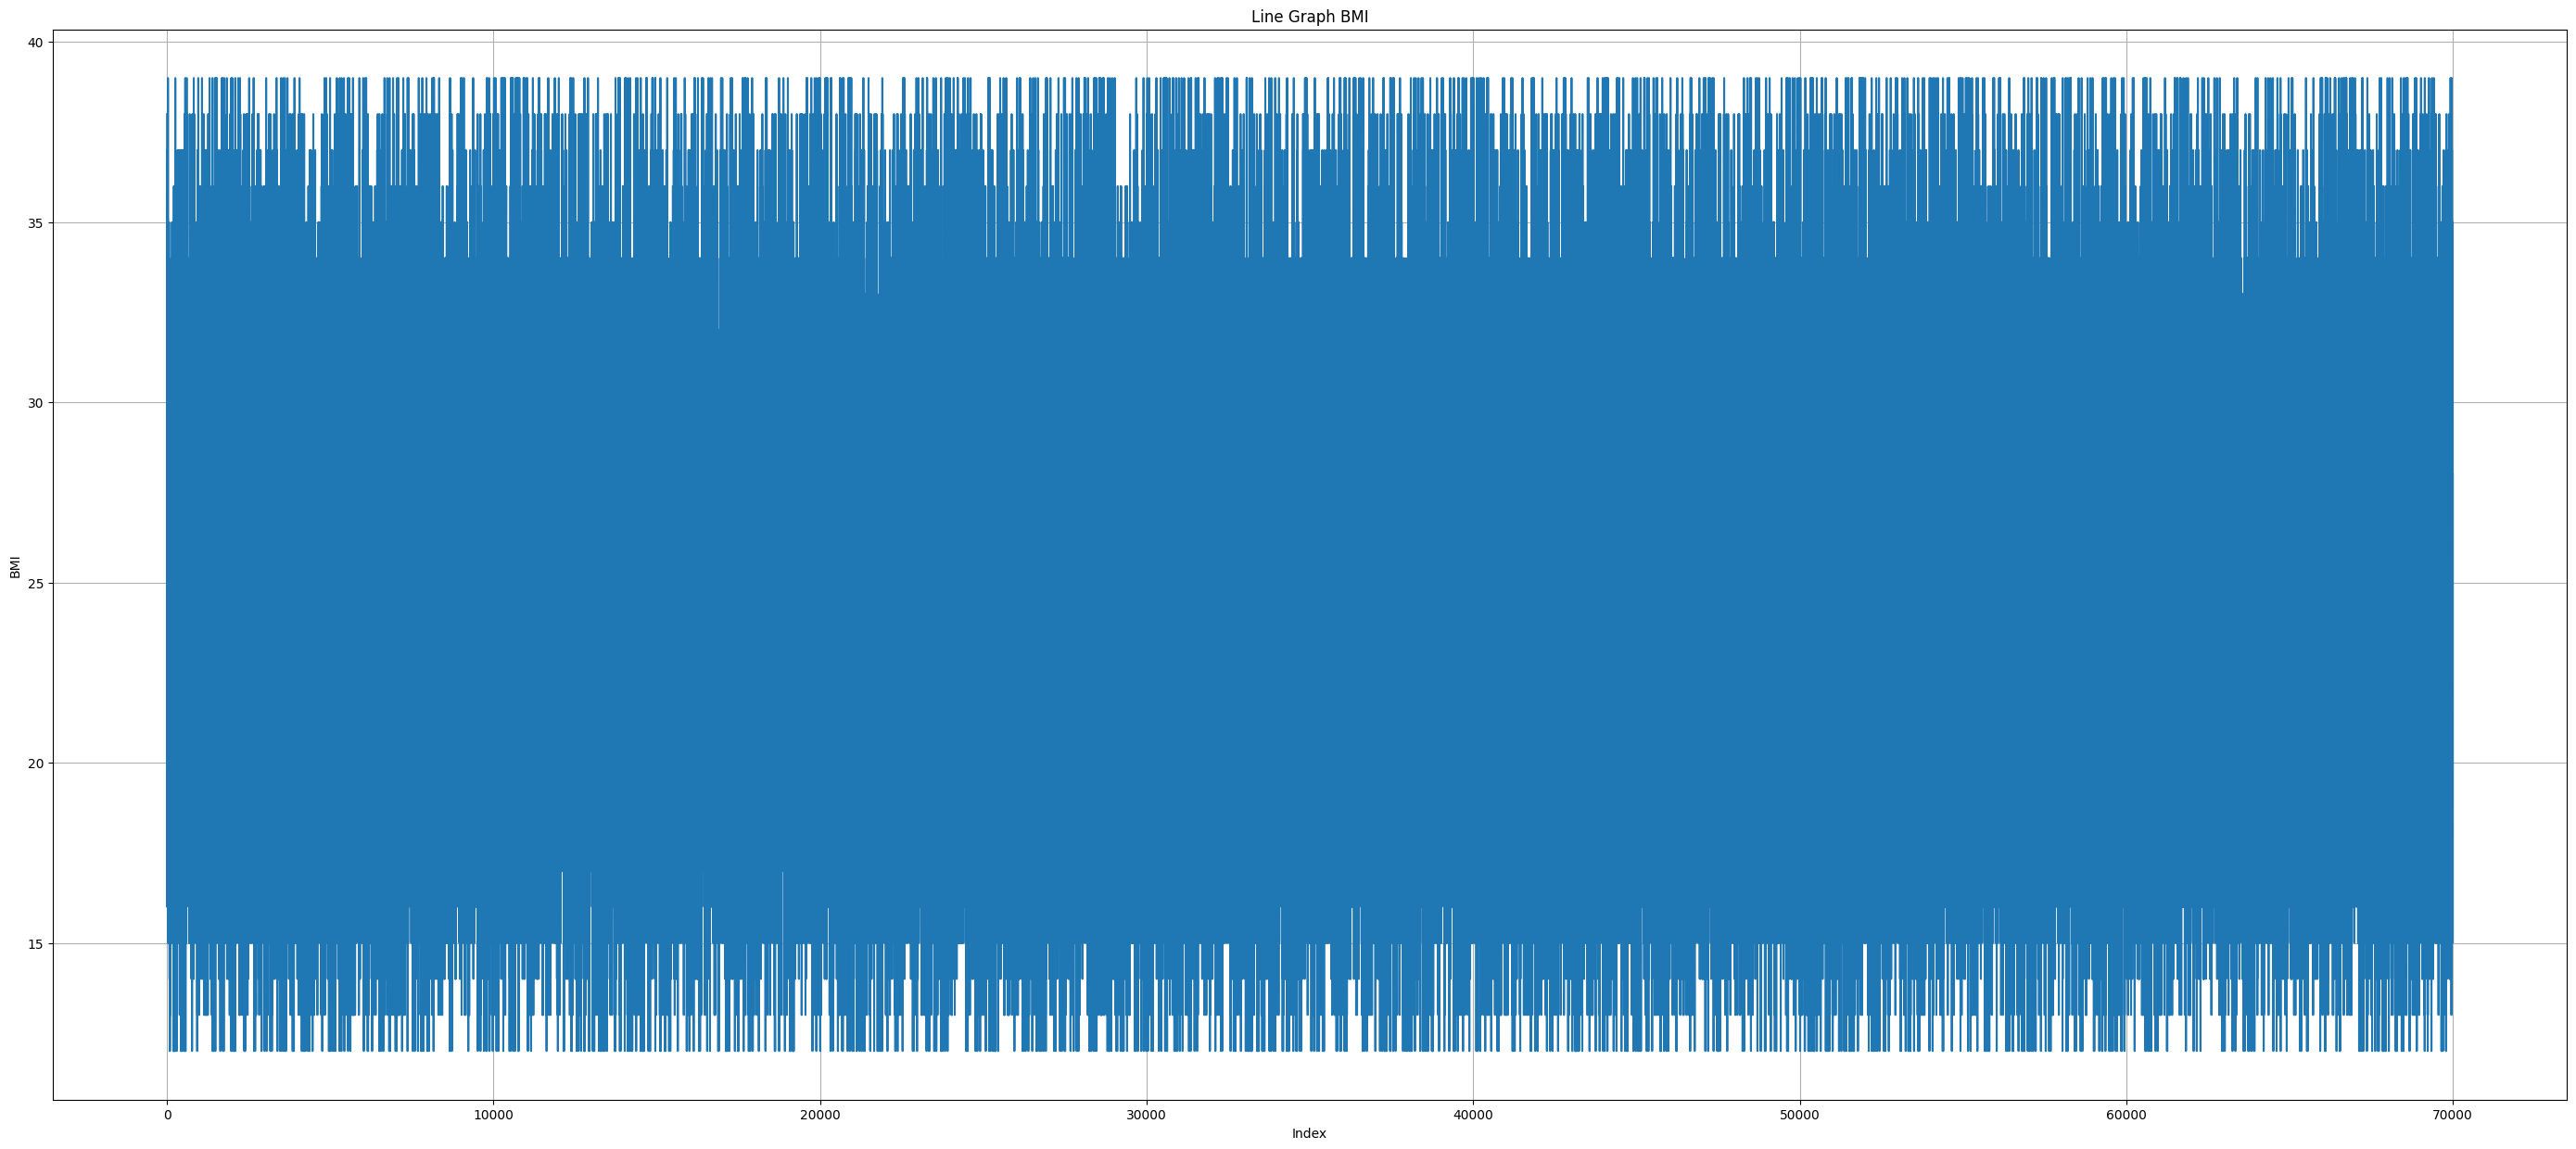

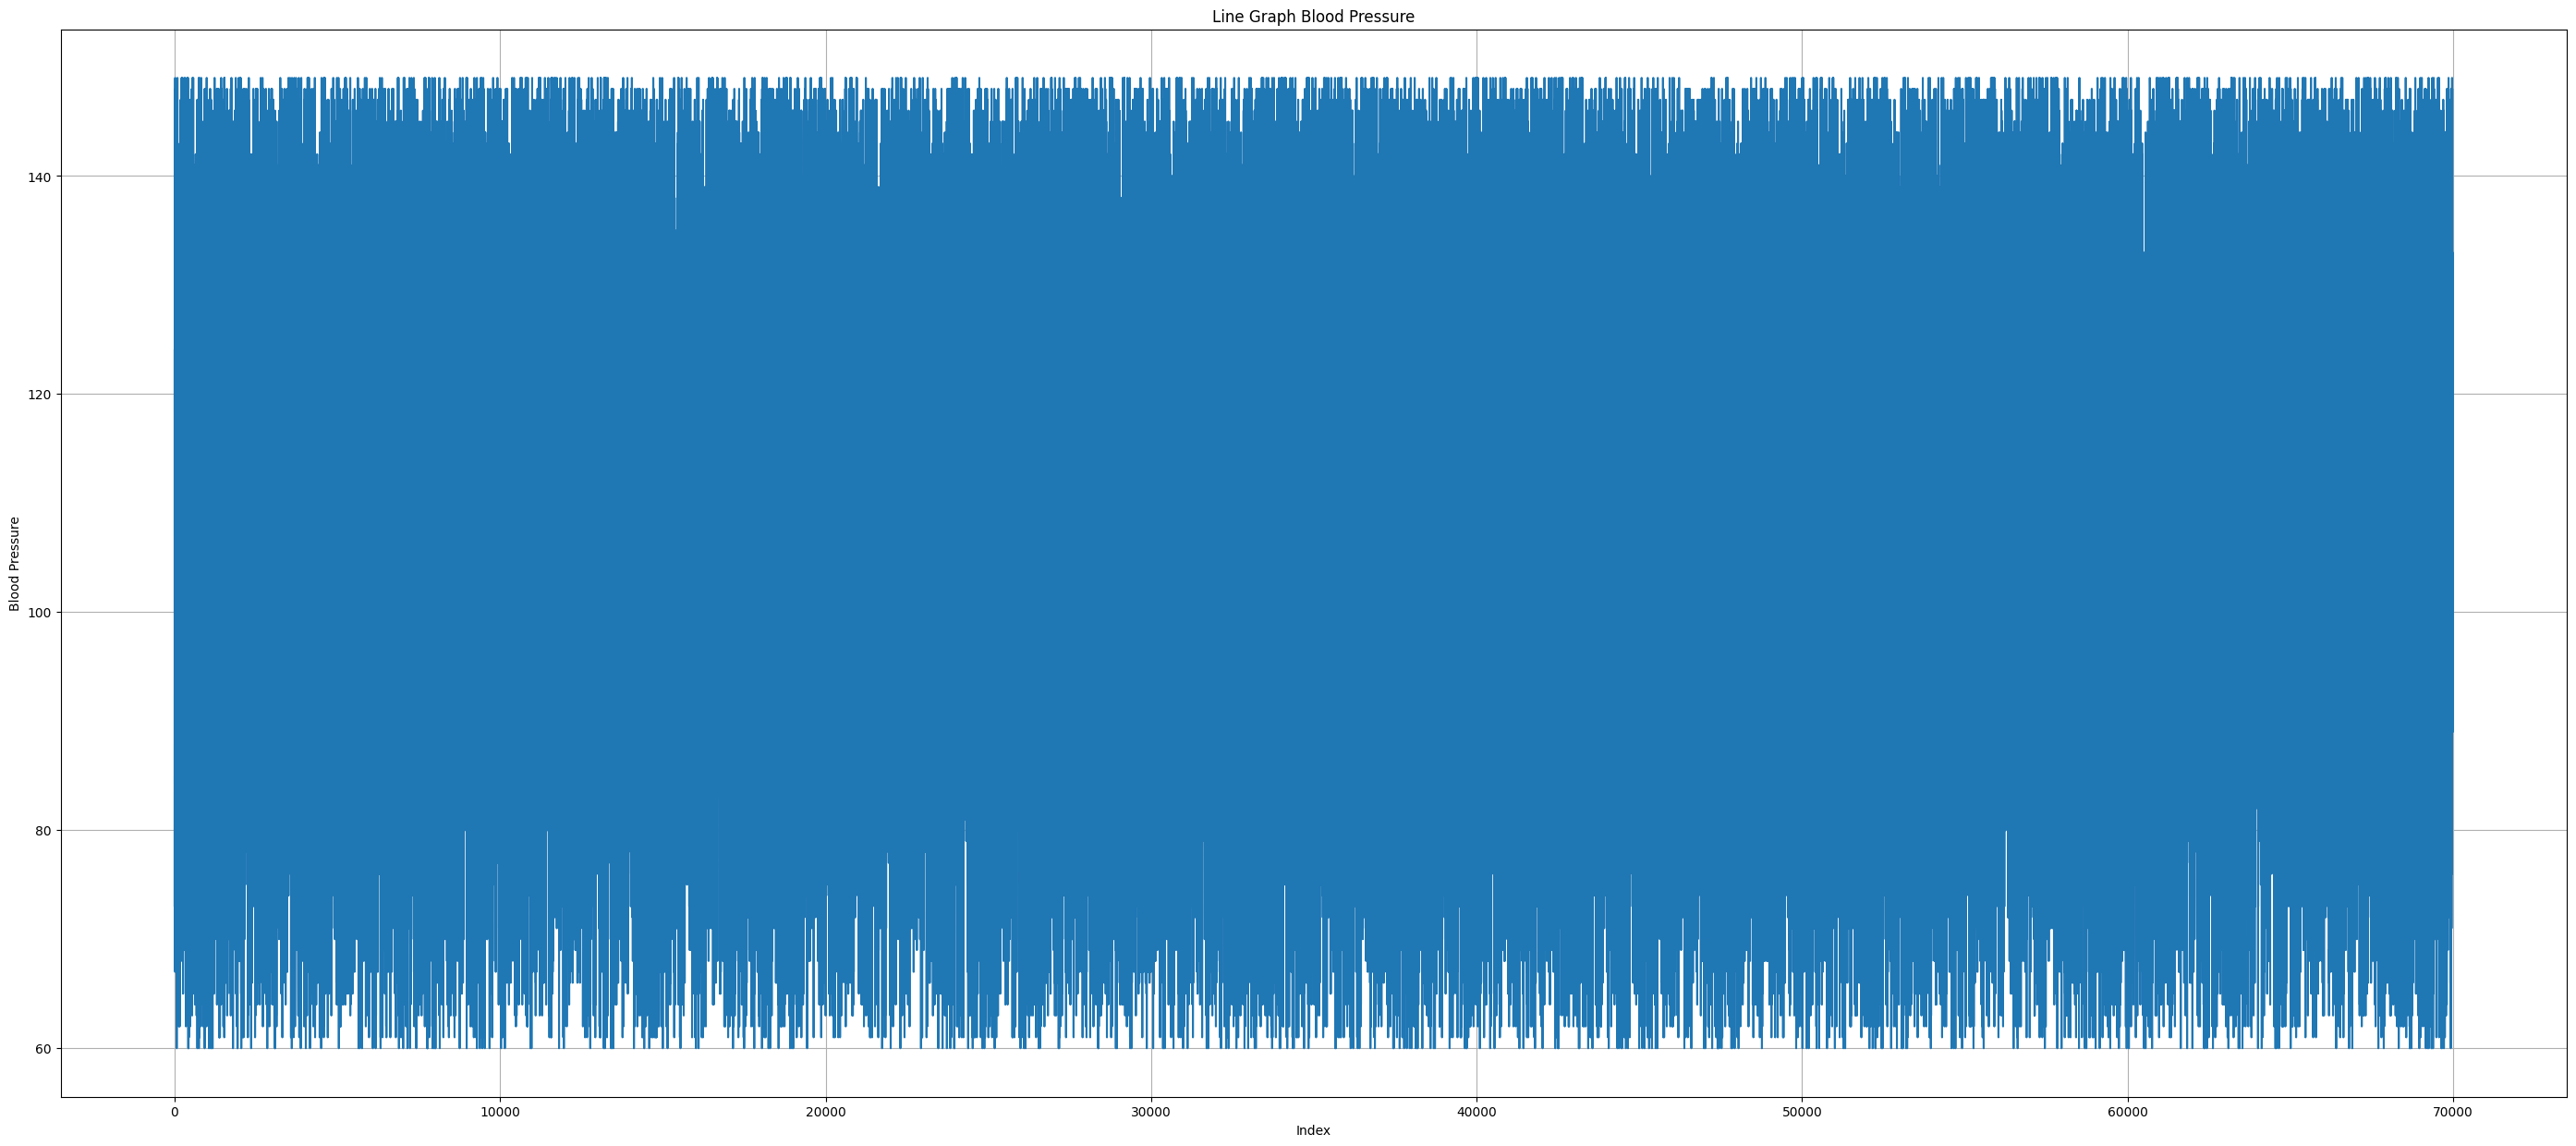

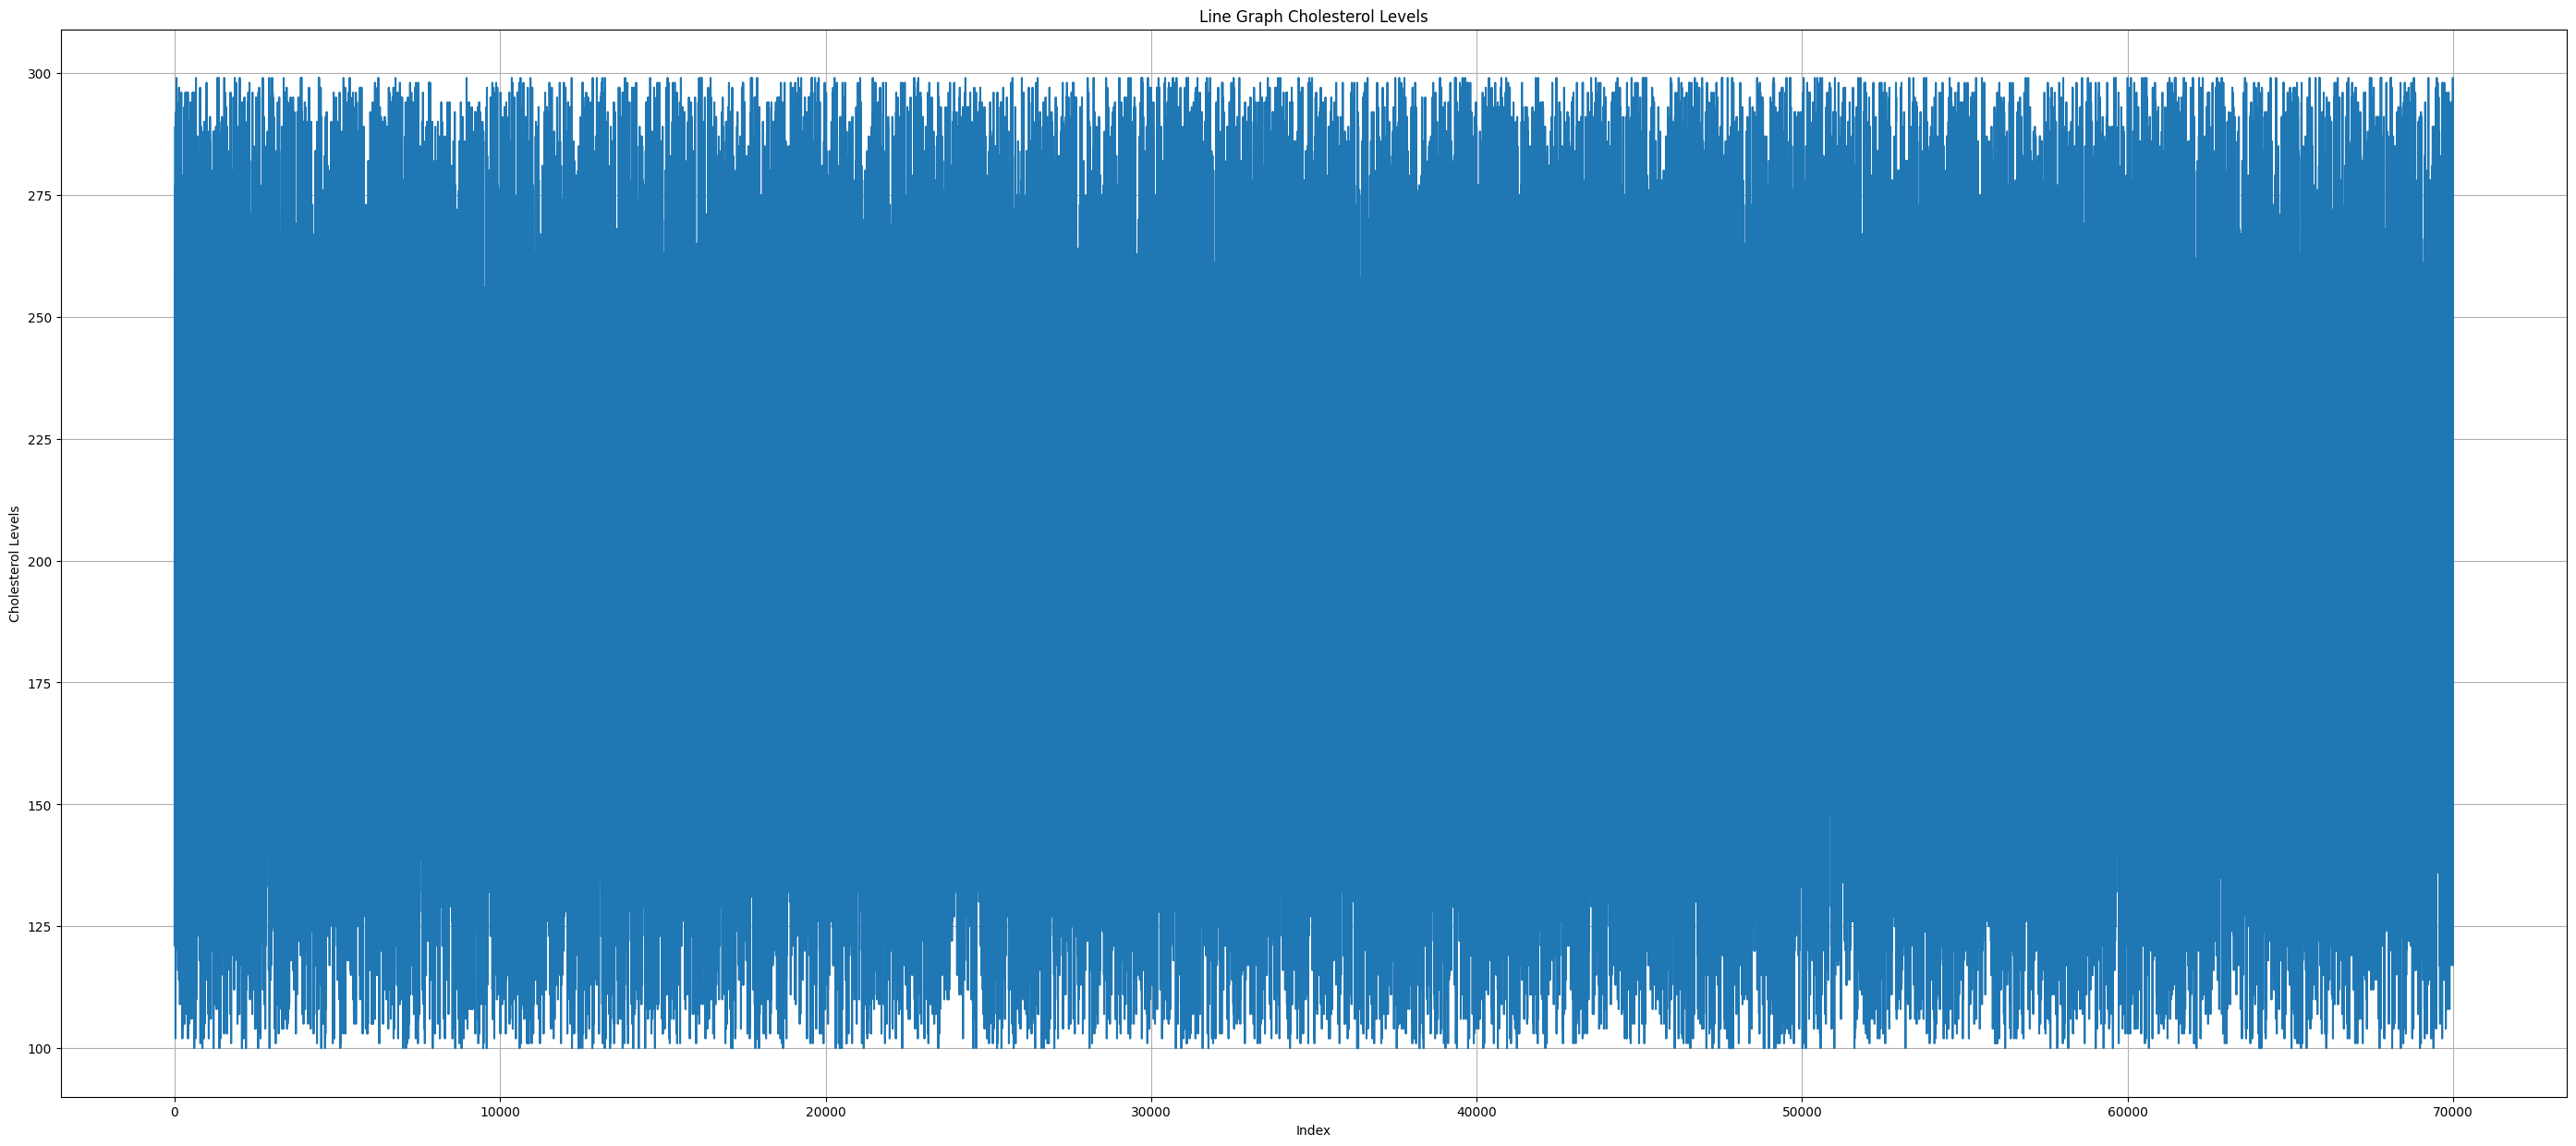

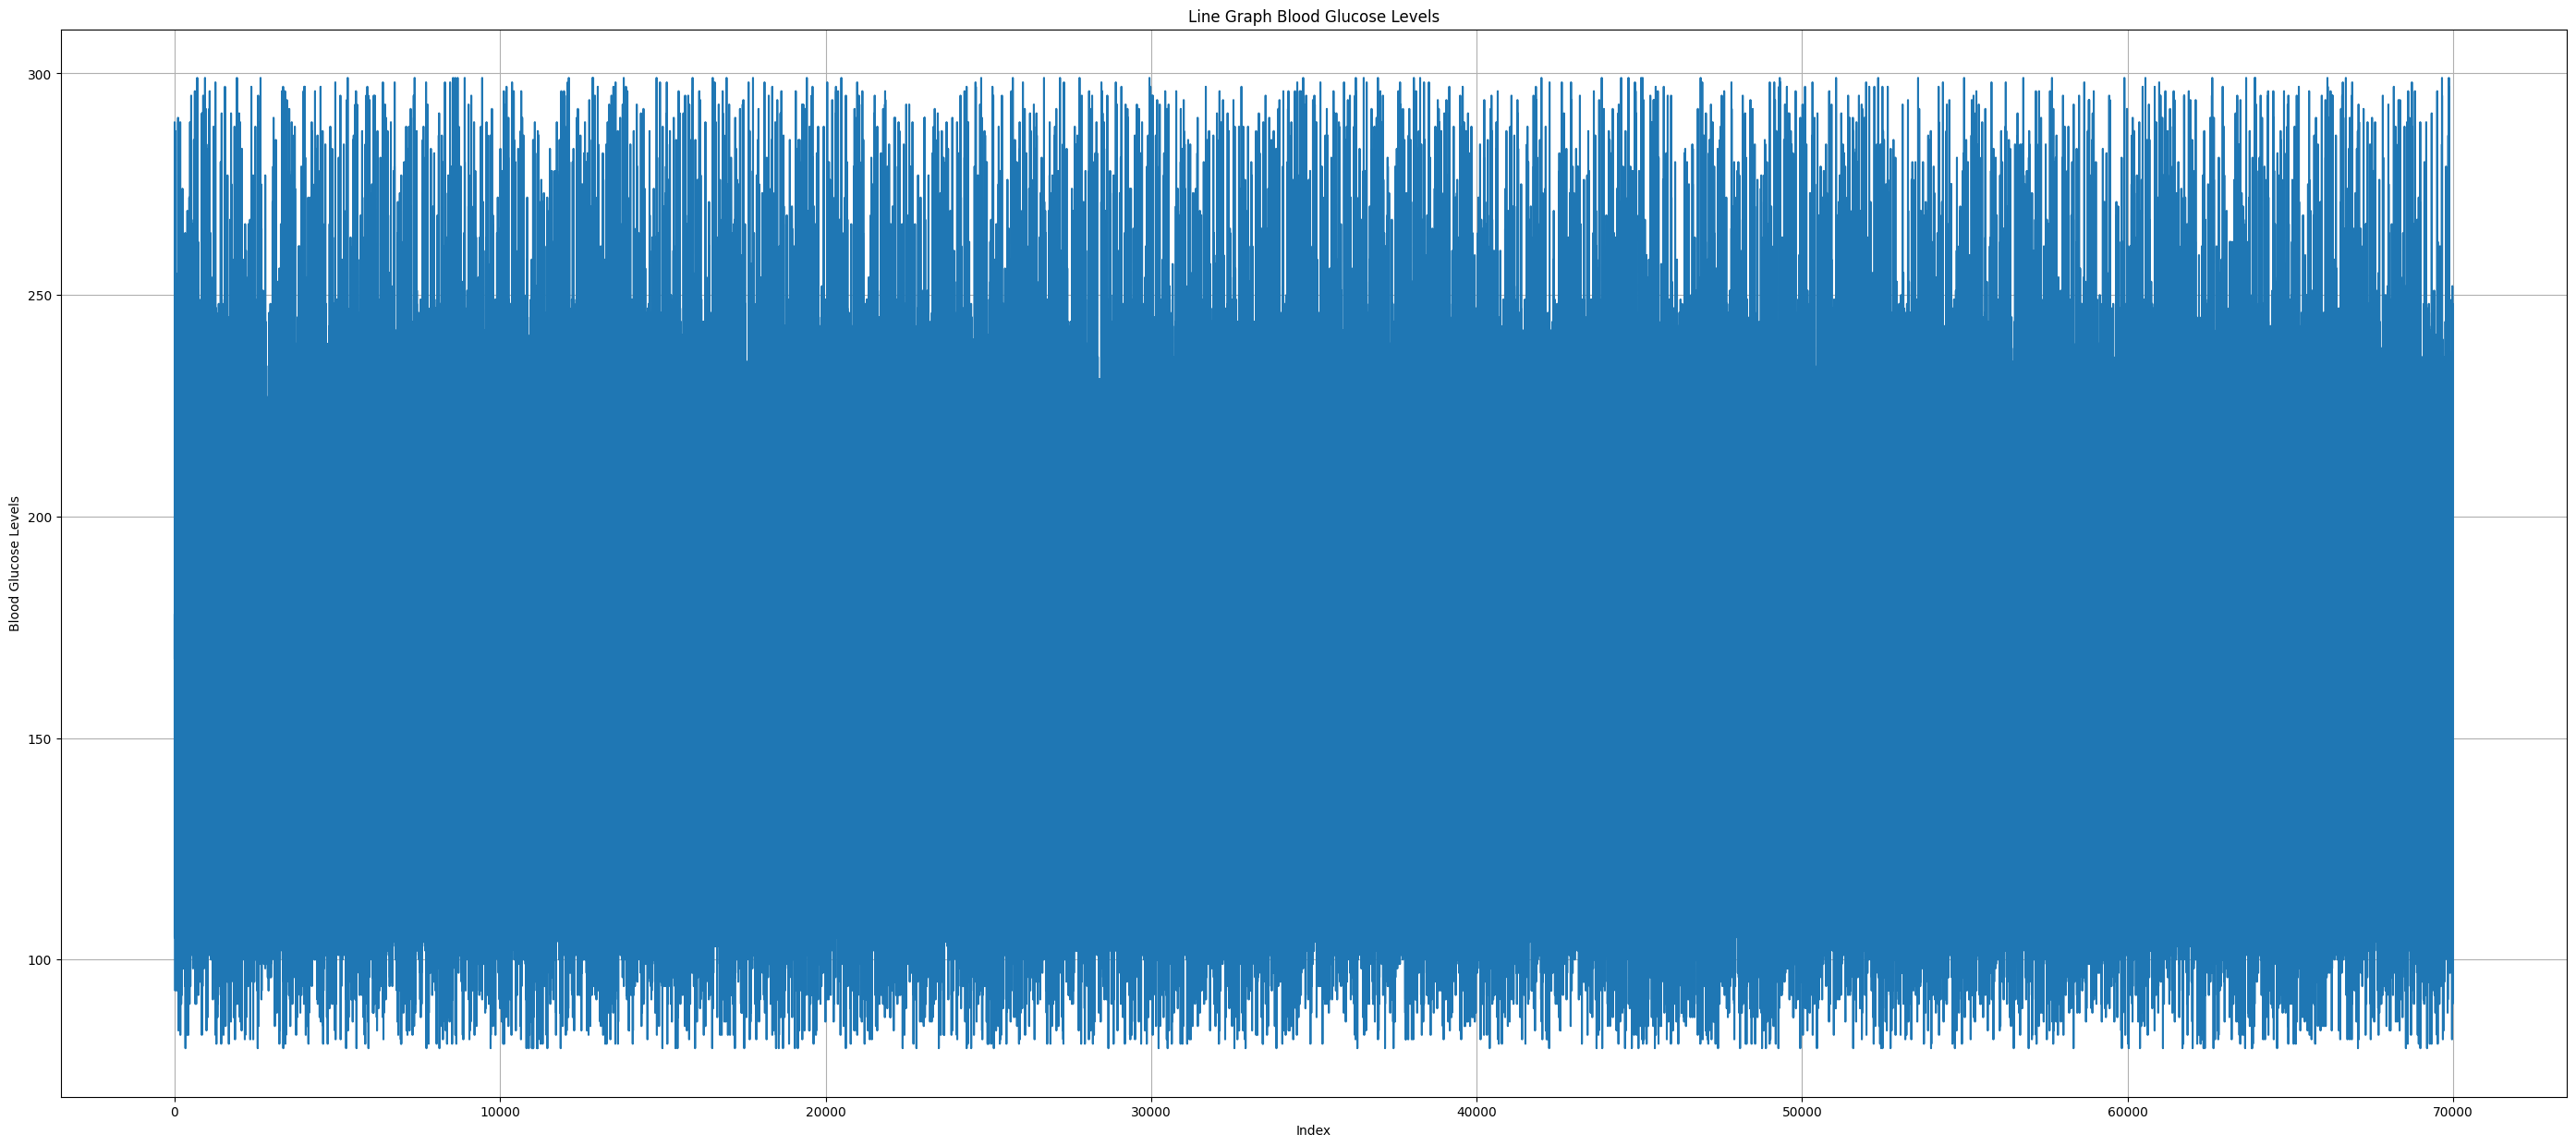

In [ ]:
for column in df_numerik.columns:
    plt.figure(figsize=(35, 15))
    plt.plot(df[column])
    plt.title(f'Line Graph {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.grid(True)  # Menampilkan grid
    plt.show()

#### Histogram

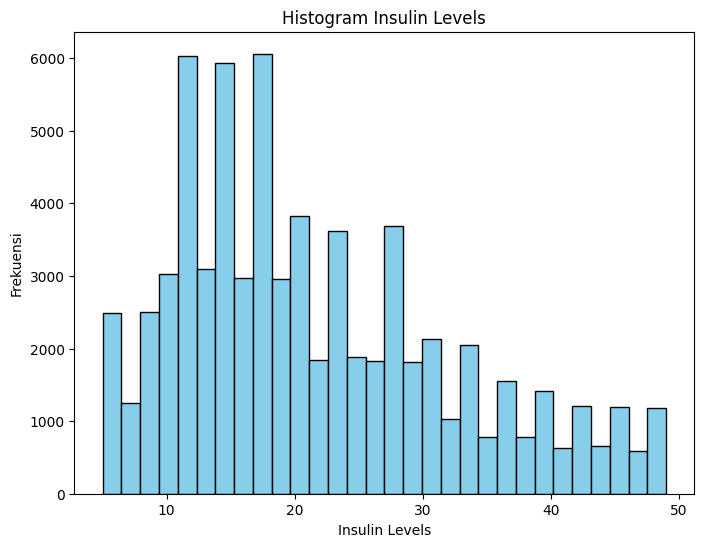

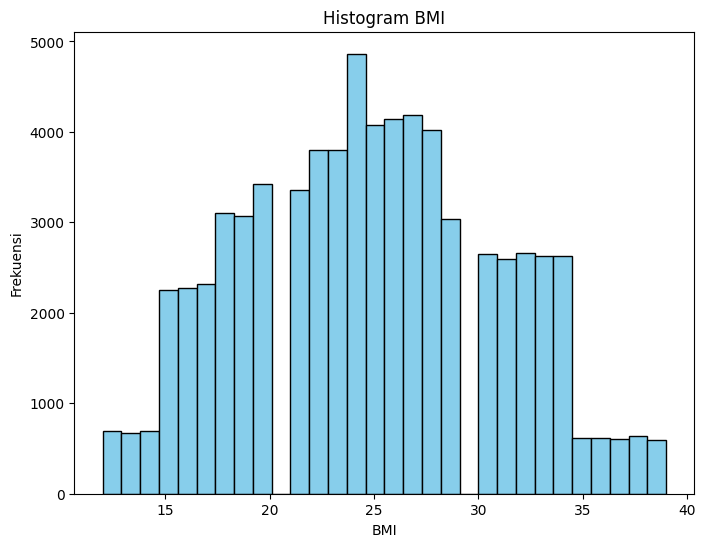

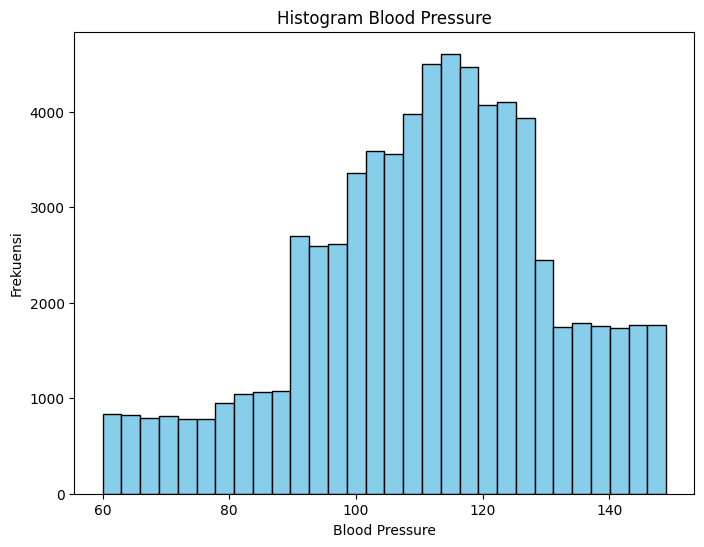

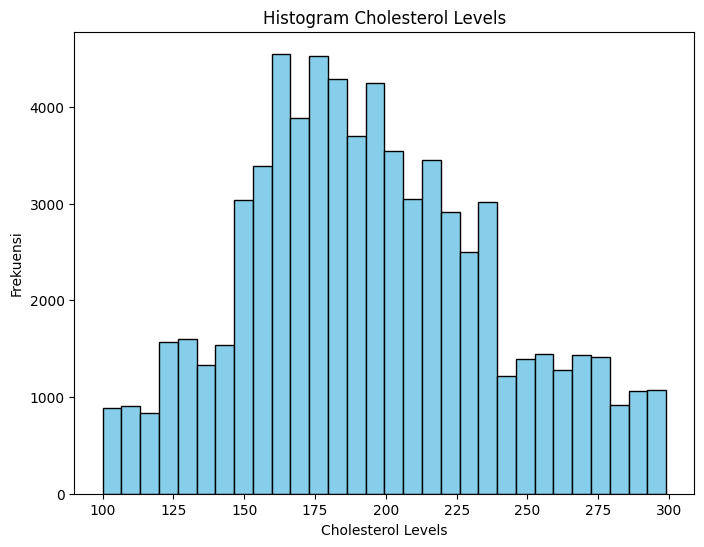

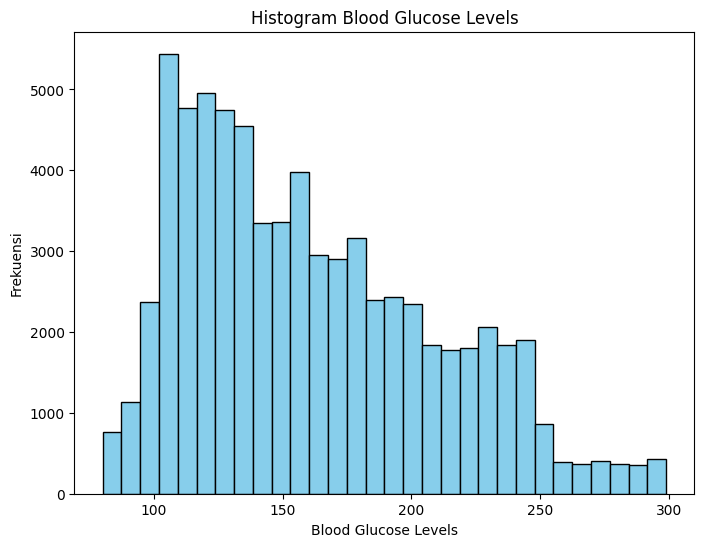

In [ ]:
for column in df_numerik.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Frekuensi')
    plt.show()

#### Boxplot

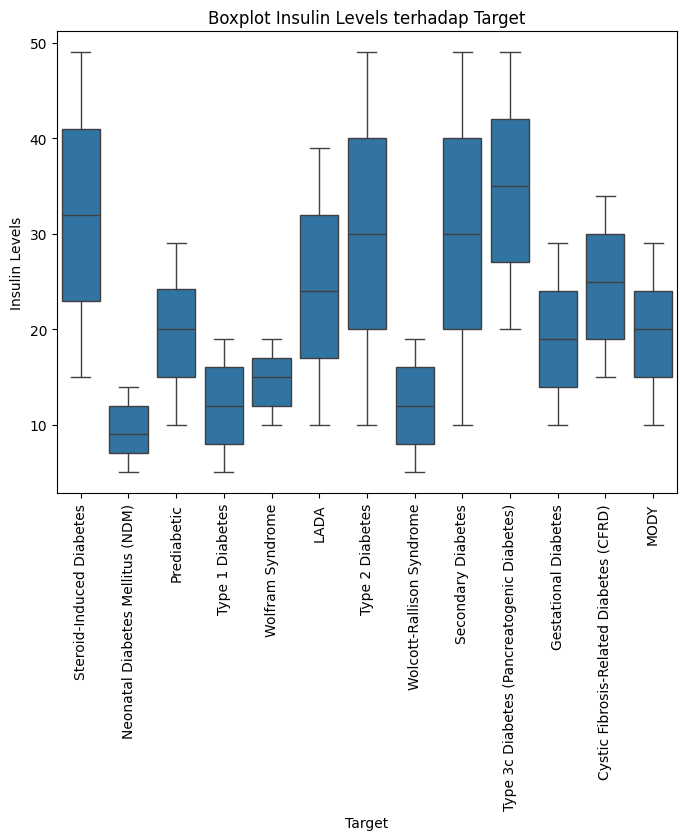

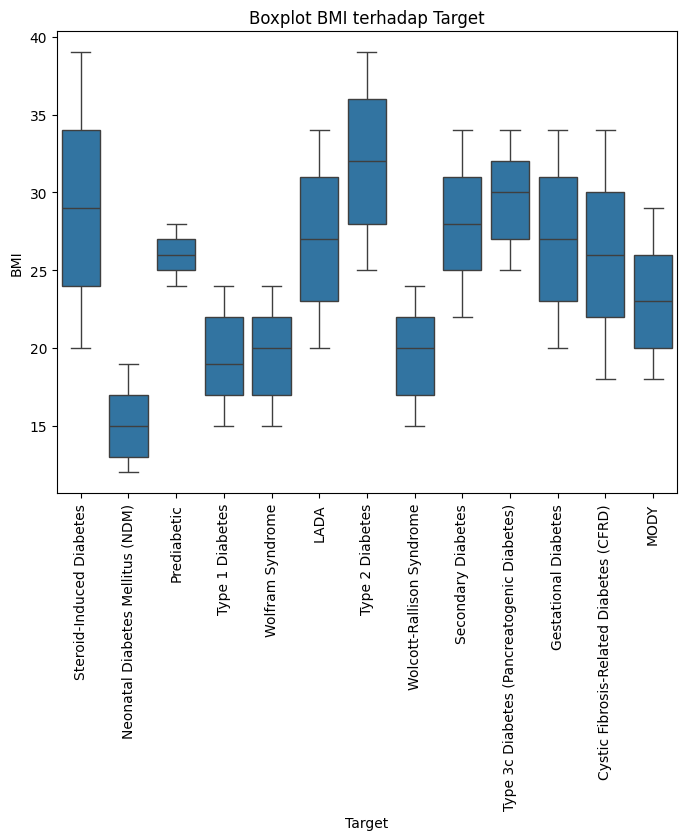

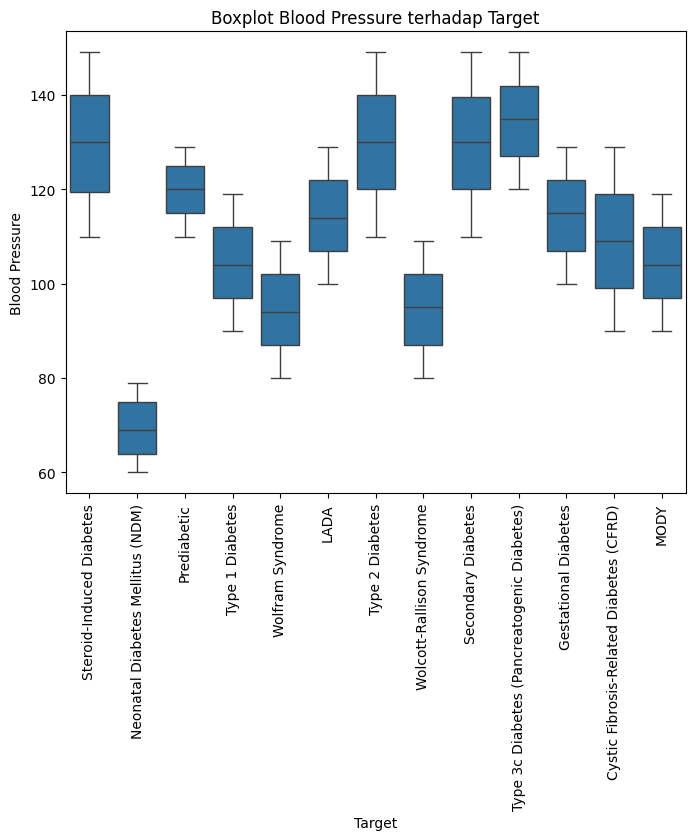

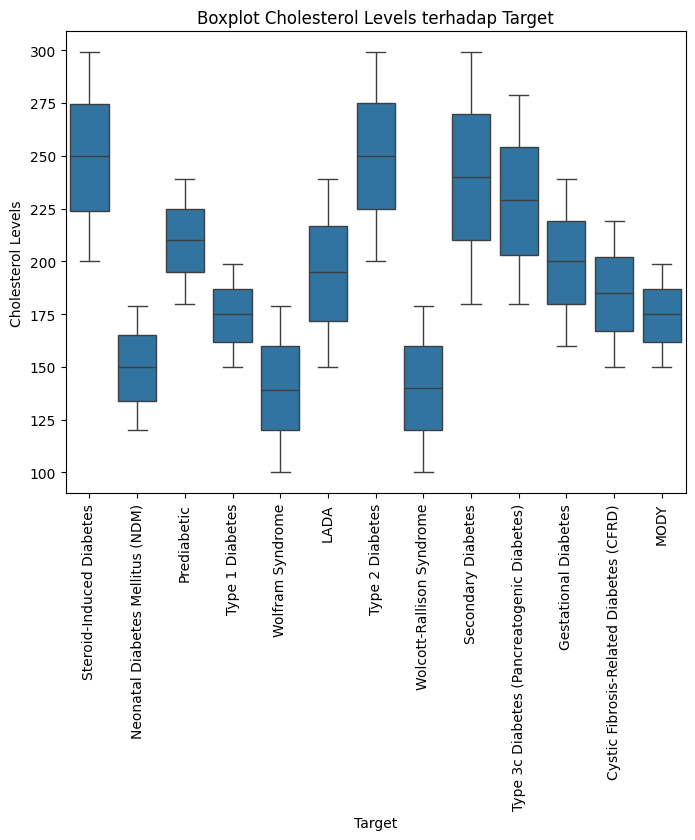

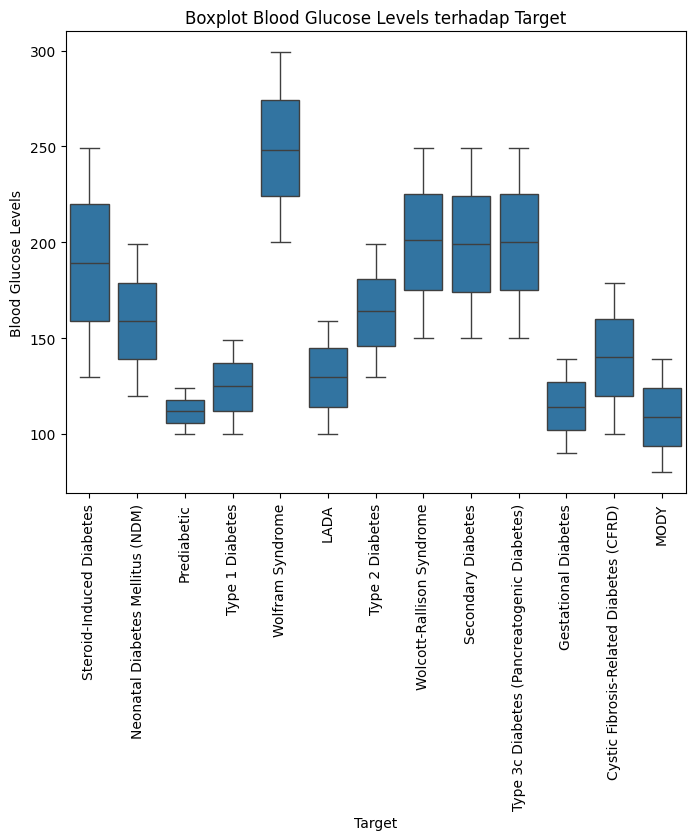

In [ ]:
for column in df_numerik.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Target', y=column, data=df)
    plt.title(f'Boxplot {column} terhadap Target')
    plt.xticks(rotation=90)
    plt.show()

#### Scatter PLot

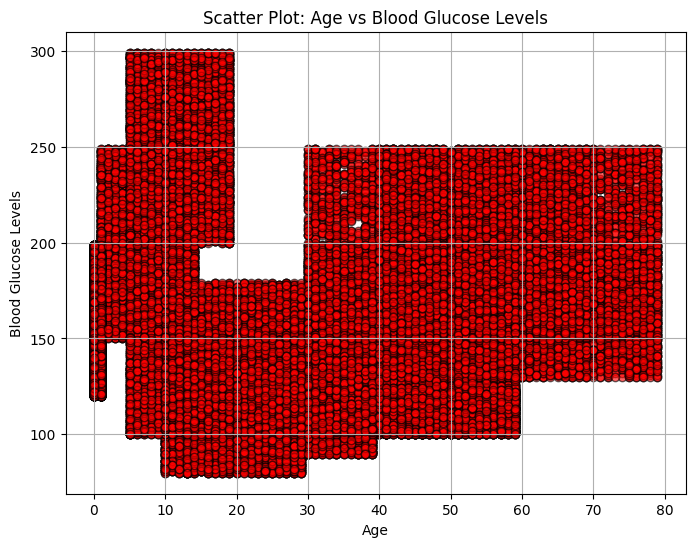

In [ ]:
# Tentukan dua fitur penting
feature_1 = 'Age'
feature_2 = 'Blood Glucose Levels'

# Buat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature_1], df[feature_2], alpha=0.6, c='red', edgecolor='black')
plt.title(f"Scatter Plot: {feature_1} vs {feature_2}")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.grid(True)
plt.show()

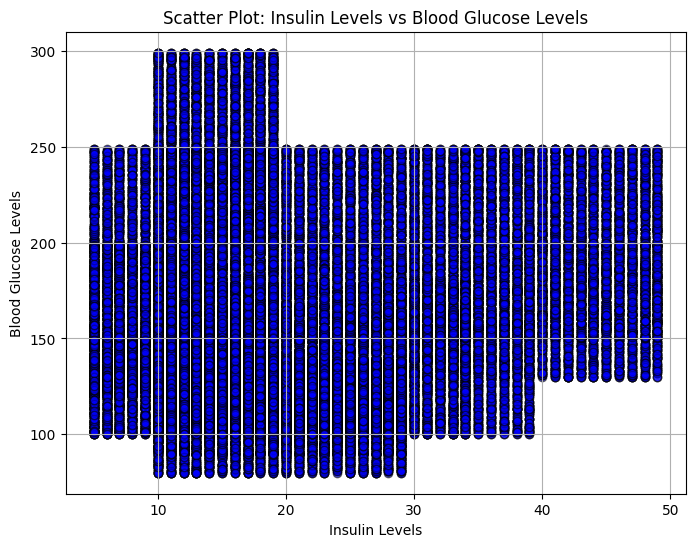

In [ ]:
# Pilih fitur
feature_1 = 'Insulin Levels'
feature_2 = 'Blood Glucose Levels'

# Buat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature_1], df[feature_2], alpha=0.6, c='blue', edgecolor='black')
plt.title(f"Scatter Plot: {feature_1} vs {feature_2}")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.grid(True)
plt.show()

## Data Preparation


### Encoding

In [ ]:
unique_targets = df['Target'].unique().tolist()
unique_targets.sort()

print("Unique Targets:")
for target in unique_targets:
    print(target)

Unique Targets:
Cystic Fibrosis-Related Diabetes (CFRD)
Gestational Diabetes
LADA
MODY
Neonatal Diabetes Mellitus (NDM)
Prediabetic
Secondary Diabetes
Steroid-Induced Diabetes
Type 1 Diabetes
Type 2 Diabetes
Type 3c Diabetes (Pancreatogenic Diabetes)
Wolcott-Rallison Syndrome
Wolfram Syndrome


In [ ]:
with open('unique_targets.txt', 'w') as f:
    for target in unique_targets:
        f.write(f"{target}\n")

In [ ]:
#Mengubah Format menjadi int
#kategori = df
#label_encoder = LabelEncoder()
#for column in kategori:
#    df[column] = label_encoder.fit_transform(df[column])


# Mengubah format menjadi int
from sklearn.preprocessing import LabelEncoder

kategori = df
label_encoder = LabelEncoder()
for column in kategori:
    df[column] = label_encoder.fit_transform(df[column])

# Mengurutkan DataFrame berdasarkan kolom "Target"
df_sorted = df.sort_values(by="Target", ascending=True)  # ascending=False untuk urutan menurun

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Target                         70000 non-null  int64
 1   Genetic Markers                70000 non-null  int64
 2   Autoantibodies                 70000 non-null  int64
 3   Family History                 70000 non-null  int64
 4   Environmental Factors          70000 non-null  int64
 5   Insulin Levels                 70000 non-null  int64
 6   Age                            70000 non-null  int64
 7   BMI                            70000 non-null  int64
 8   Physical Activity              70000 non-null  int64
 9   Dietary Habits                 70000 non-null  int64
 10  Blood Pressure                 70000 non-null  int64
 11  Cholesterol Levels             70000 non-null  int64
 12  Waist Circumference            70000 non-null  int64
 13  Blood Glucose Le

In [ ]:
df.describe()

Target  Genetic Markers  Autoantibodies  Family History  \
count  70000.000000     70000.000000    70000.000000    70000.000000   
mean       5.989729         0.501443        0.499171        0.502400   
std        3.737753         0.500001        0.500003        0.499998   
min        0.000000         0.000000        0.000000        0.000000   
25%        3.000000         0.000000        0.000000        0.000000   
50%        6.000000         1.000000        0.000000        1.000000   
75%        9.000000         1.000000        1.000000        1.000000   
max       12.000000         1.000000        1.000000        1.000000   

       Environmental Factors  Insulin Levels           Age           BMI  \
count           70000.000000    70000.000000  70000.000000  70000.000000   
mean                0.498743       16.607443     32.020700     12.782943   
std                 0.500002       10.785852     21.043173      6.014236   
min                 0.000000        0.000000      0.000000      0.000000   
25%                 0.000000        8.000000     14.000000      8.000000   
50%                 0.000000       14.000000     31.000000     13.000000   
75%                 1.000000       23.000000     49.000000     17.000000   
max                 1.000000       44.000000     79.000000     27.000000   

       Physical Activity  Dietary Habits  ...  Pulmonary Function  \
count       70000.000000    70000.000000  ...        70000.000000   
mean            1.002886        0.499714  ...           40.264671   
std             0.816369        0.500003  ...           11.965600   
min             0.000000        0.000000  ...            0.000000   
25%             0.000000        0.000000  ...           33.000000   
50%             1.000000        0.000000  ...           42.000000   
75%             2.000000        1.000000  ...           49.000000   
max             2.000000        1.000000  ...           59.000000   

       Cystic Fibrosis Diagnosis  Steroid Use History  Genetic Testing  \
count               70000.000000         70000.000000     70000.000000   
mean                    0.498071             0.497971         0.504500   
std                     0.500000             0.499999         0.499983   
min                     0.000000             0.000000         0.000000   
25%                     0.000000             0.000000         0.000000   
50%                     0.000000             0.000000         1.000000   
75%                     1.000000             1.000000         1.000000   
max                     1.000000             1.000000         1.000000   

       Neurological Assessments  Liver Function Tests  \
count              70000.000000          70000.000000   
mean                   0.804157              0.500271   
std                    0.680154              0.500003   
min                    0.000000              0.000000   
25%                    0.000000              0.000000   
50%                    1.000000              1.000000   
75%                    1.000000              1.000000   
max                    2.000000              1.000000   

       Digestive Enzyme Levels    Urine Test  Birth Weight  \
count             70000.000000  70000.000000  70000.000000   
mean                 36.420529      1.505171   1597.061071   
std                  19.391089      1.118669    713.837300   
min                   0.000000      0.000000      0.000000   
25%                  21.000000      1.000000   1129.000000   
50%                  38.000000      2.000000   1603.000000   
75%                  51.000000      3.000000   2156.250000   
max                  89.000000      3.000000   2999.000000   

       Early Onset Symptoms  
count          70000.000000  
mean               0.499157  
std                0.500003  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                1.000000  
max                1.000000  

[8 rows x 34 columns]

### Data Filtering

In [ ]:
df = df[df['Age'] != 0]
df['Age'].value_counts()

Age
1     3165
10    1493
14    1437
11    1408
13    1391
      ... 
72     246
70     245
71     235
73     228
77     227
Name: count, Length: 79, dtype: int64

### Feature Importance

In [ ]:
# model = ExtraTreesClassifier()
# model.fit(X,y)
# print(model.feature_importances_)
# feat_importance = pd.Series(model.feature_importances_,index=X.columns)
# feat_importance.nlargest(10).plot(kind='barh')
# plt.show()

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['Target'])  # Fitur
y = df['Target']  # Target klasifikasi

In [ ]:
# Pastikan fitur kategorikal diubah ke format numerik (One-Hot Encoding atau Label Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

In [ ]:
# Seleksi fitur dengan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Urutkan fitur berdasarkan kepentingan
feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
# Tampilkan 10 fitur terbaik
print("Top 10 Fitur berdasarkan Feature Importance:")
print(feature_importances.head(10))

Top 10 Fitur berdasarkan Feature Importance:
                         Feature  Importance
12          Blood Glucose Levels    0.139157
5                            Age    0.130890
21  Weight Gain During Pregnancy    0.086203
6                            BMI    0.077670
29       Digestive Enzyme Levels    0.077419
9                 Blood Pressure    0.075284
11           Waist Circumference    0.071602
4                 Insulin Levels    0.066404
10            Cholesterol Levels    0.060690
23            Pulmonary Function    0.054415


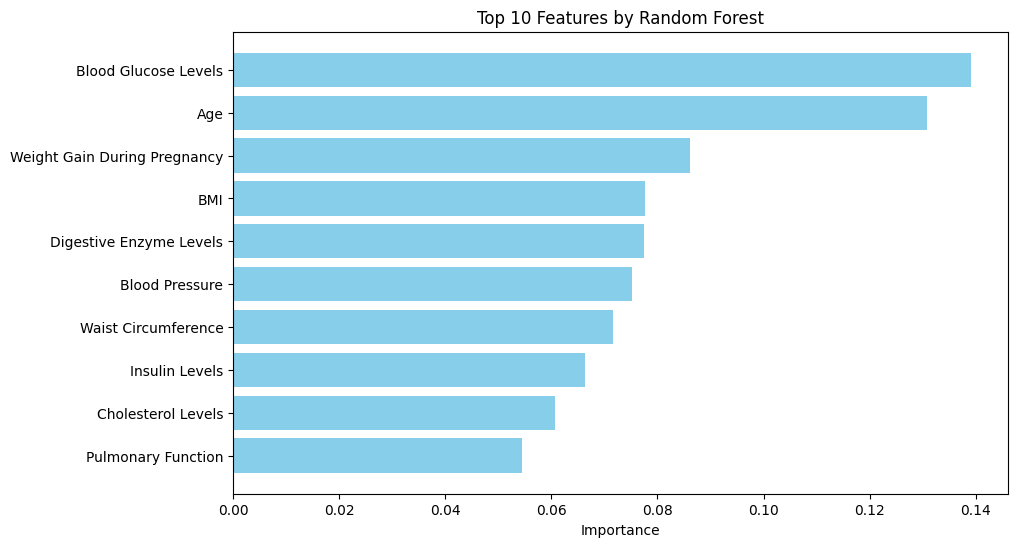

In [ ]:
# Visualisasi fitur terbaik
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.xlabel("Importance")
plt.title("Top 10 Features by Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Univariate Selection

In [ ]:
select_feature = SelectKBest(score_func=chi2, k='all')
fit = select_feature.fit(X_encoded,y)

dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScore = pd.concat([dfcolumns,dfscore],axis=1)
featureScore.columns = ['columns','score']
print(featureScore.sort_values(by='score', ascending=False).round(2).head(10))

                         columns        score
31                  Birth Weight  10564275.75
12          Blood Glucose Levels   1536847.70
10            Cholesterol Levels    967136.44
5                            Age    696279.76
29       Digestive Enzyme Levels    408201.25
9                 Blood Pressure    320406.81
21  Weight Gain During Pregnancy    281507.55
22             Pancreatic Health    270430.49
4                 Insulin Levels    232080.81
23            Pulmonary Function    149558.06


# Corelation Matrik

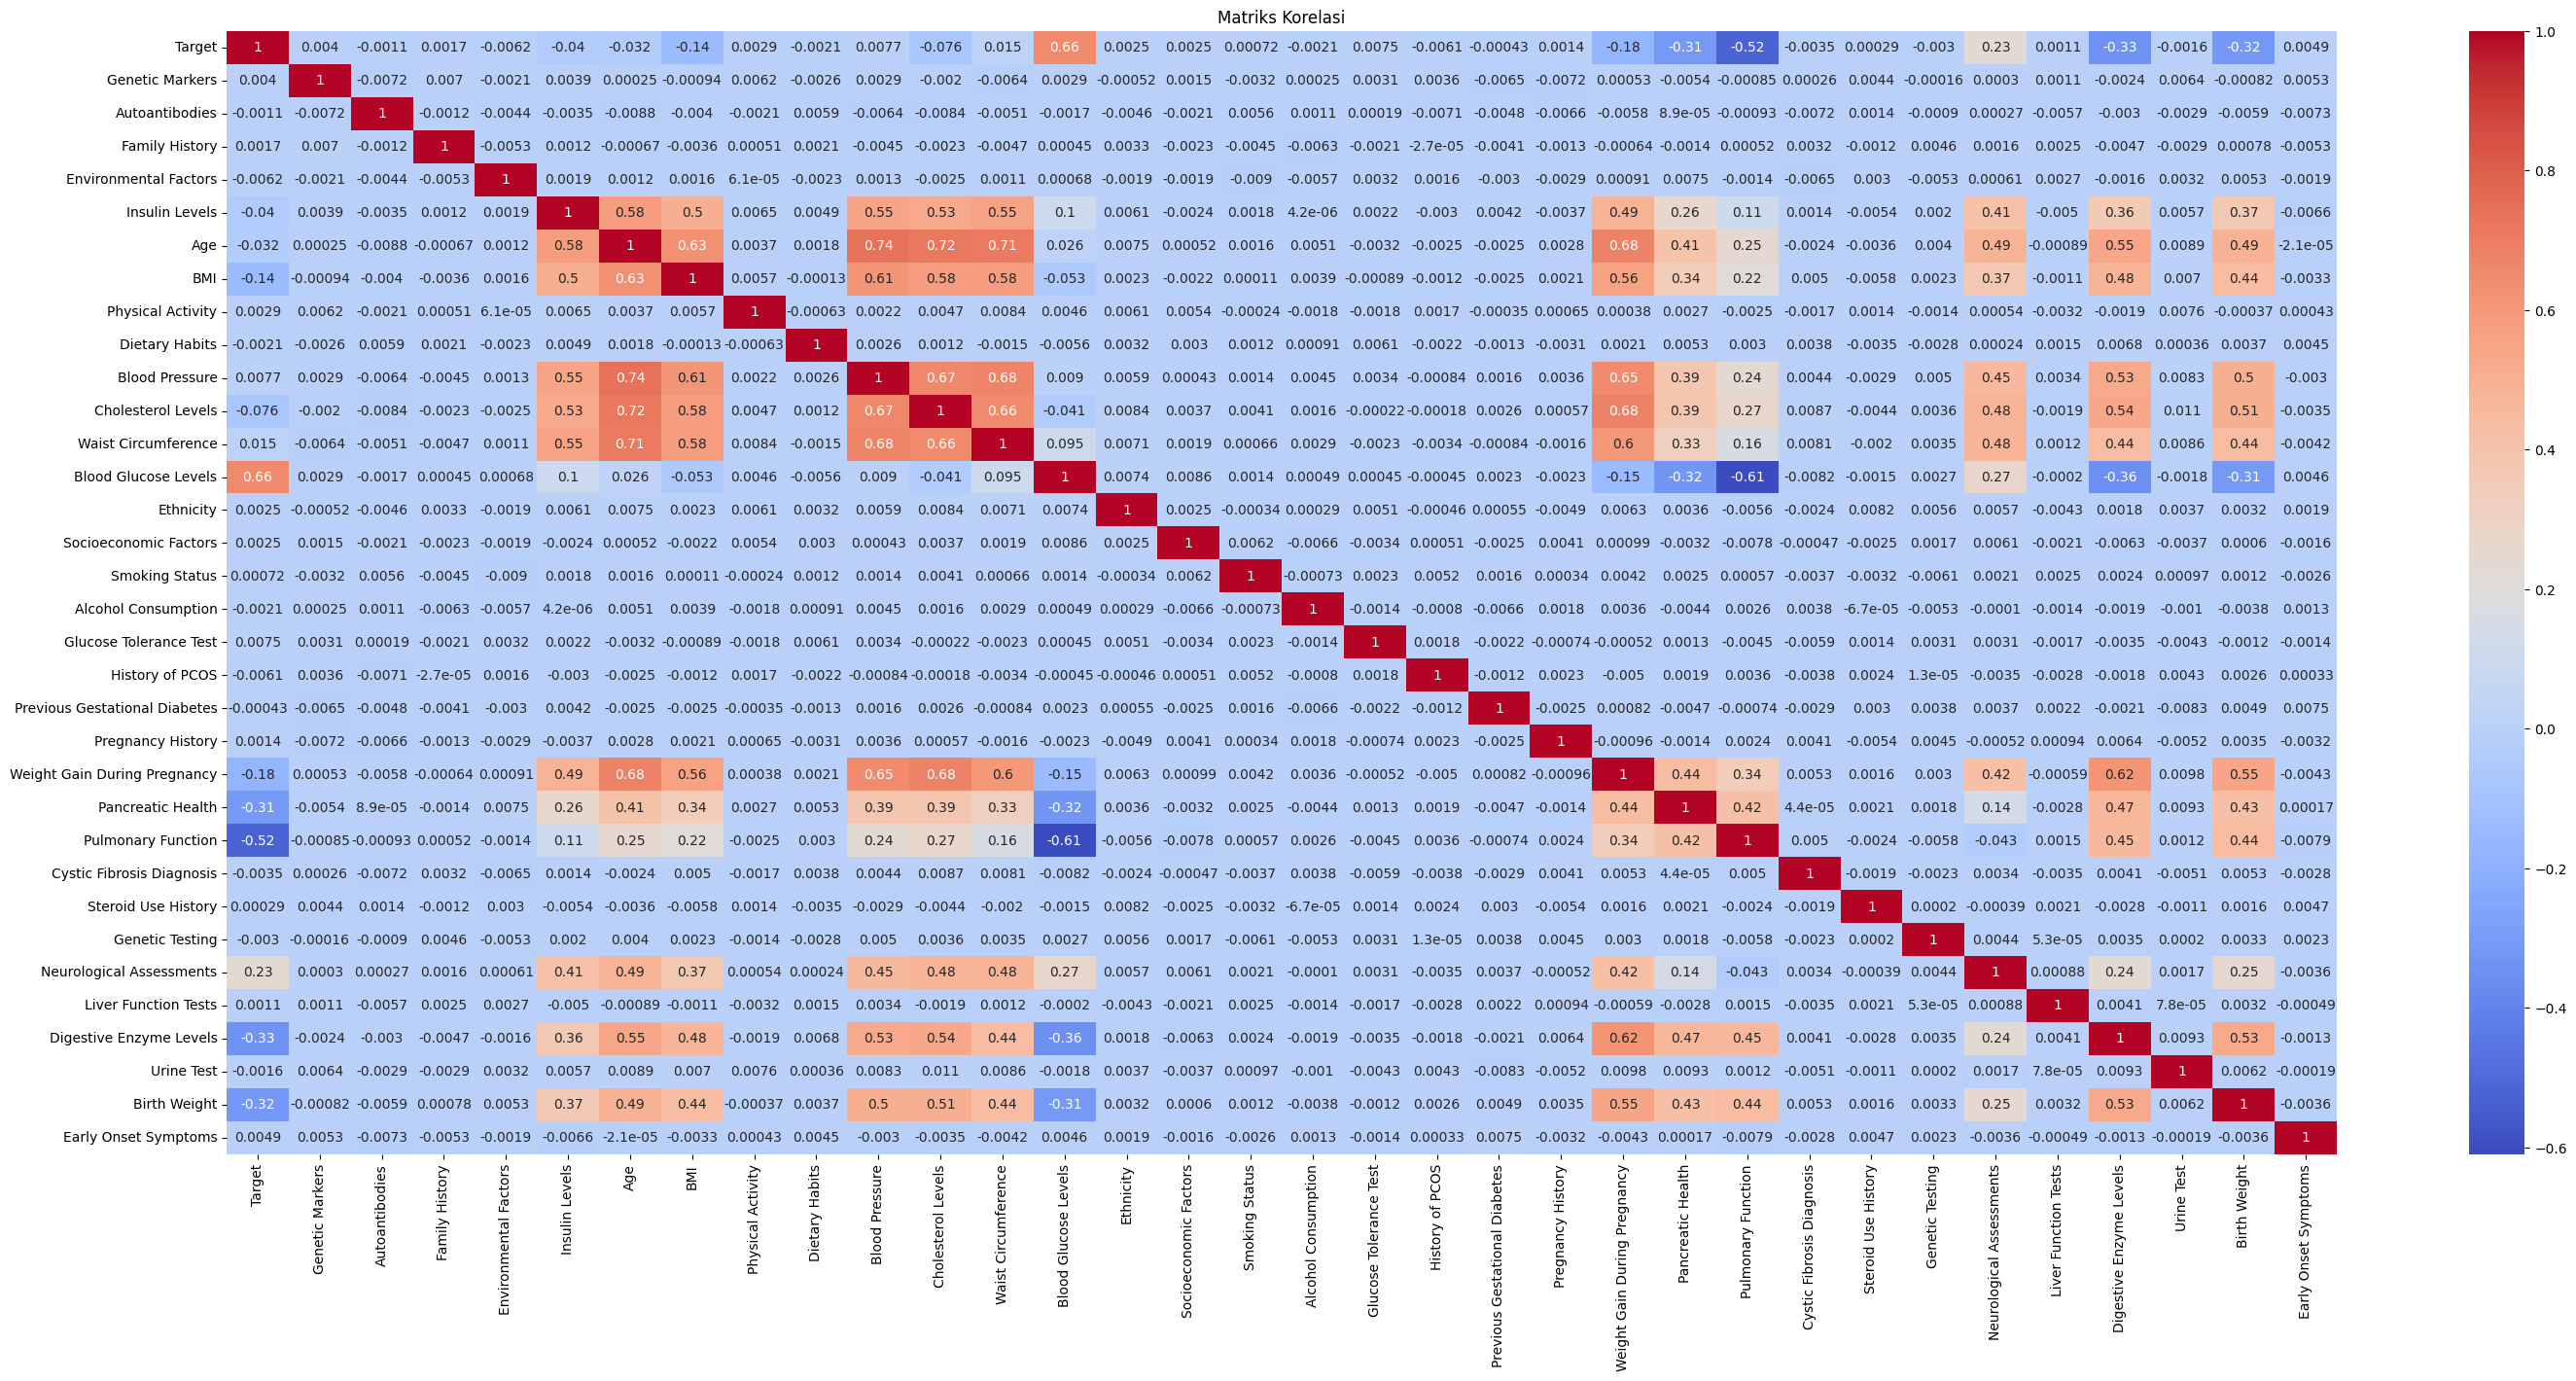

In [ ]:
correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

plt.figure(figsize=(35, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

### Hasil Akhir


In [ ]:
df

Target  Genetic Markers  Autoantibodies  Family History  \
0           7                1               0               0   
1           4                1               0               0   
2           5                1               1               1   
3           8                0               1               0   
4          12                0               0               1   
...       ...              ...             ...             ...   
69995       7                0               0               1   
69996       2                1               1               0   
69997       8                1               0               0   
69998       0                1               0               0   
69999       2                1               1               1   

       Environmental Factors  Insulin Levels  Age  BMI  Physical Activity  \
0                          1              35   44   26                  0   
1                          1               8    1    5                  0   
2                          1              22   36   12                  0   
3                          1               3    7    4                  1   
4                          1              12   10    5                  0   
...                      ...             ...  ...  ...                ...   
69995                      1              19   38   23                  0   
69996                      0              16   51   19                  1   
69997                      0              13   11    3                  1   
69998                      0              27   30   12                  0   
69999                      0              22   41   16                  2   

       Dietary Habits  ...  Pulmonary Function  Cystic Fibrosis Diagnosis  \
0                   0  ...                  46                          0   
1                   0  ...                  30                          1   
2                   1  ...                  50                          1   
3                   1  ...                  59                          1   
4                   0  ...                  11                          0   
...               ...  ...                 ...                        ...   
69995               1  ...                  41                          1   
69996               1  ...                  52                          1   
69997               1  ...                  47                          1   
69998               0  ...                  40                          0   
69999               0  ...                  54                          0   

       Steroid Use History  Genetic Testing  Neurological Assessments  \
0                        0                1                         2   
1                        0                0                         0   
2                        0                0                         0   
3                        0                1                         1   
4                        0                1                         0   
...                    ...              ...                       ...   
69995                    1                1                         1   
69996                    1                0                         0   
69997                    1                1                         1   
69998                    0                1                         0   
69999                    1                0                         1   

       Liver Function Tests  Digestive Enzyme Levels  Urine Test  \
0                         1                       46           1   
1                         1                       18           0   
2                         0                       45           1   
3                         0                       50           1   
4                         1                       14           3   
...                     ...                      ...         ...   
69995      

# UAS

In [ ]:
!pip install wolta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
#data manipulating

from wolta.feature_tools import list_deletings

df = list_deletings(df)

The maximum tolerated null value amount is 13469
The maximum tolerated unique value amount is 6734 in string data


<Axes: ylabel='count'>

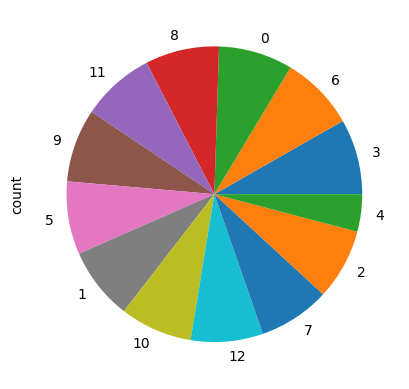

In [ ]:
df['Target'].value_counts().plot(kind='pie')

In [ ]:
#preparation
y = df['Target'].values
X = df[['Age', 'Birth Weight', 'Blood Glucose Levels', 'Blood Pressure', 'BMI', 'Cholesterol Levels', 'Digestive Enzyme Levels', 'Insulin Levels', 'Pulmonary Function', 'Weight Gain During Pregnancy']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({3: 4442, 6: 4383, 0: 4371, 8: 4357, 11: 4320, 9: 4318, 5: 4301, 1: 4275, 10: 4256, 12: 4252, 7: 4220, 2: 4178, 4: 2203})
Counter({3: 1111, 6: 1096, 0: 1093, 8: 1089, 11: 1080, 9: 1079, 5: 1075, 1: 1069, 10: 1064, 12: 1063, 7: 1055, 2: 1045, 4: 550})


In [ ]:
#Menentukan Model

from wolta.model_tools import compare_models

scores = compare_models('clf',
                       ['ada', 'cat', 'lbm', 'raf', 'dtr', 'ext', 'per', 'rdg'],
                       ['acc', 'precision', 'f1'],
                       X_train, y_train, X_test, y_test,
                       get_result=True)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


AdaBoost
Accuracy Score: 0.17521716534263865
Precision Score: 0.07510839989860085
F1 Score (weighted): 0.09159128189350152
***


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CatBoost
Accuracy Score: 0.8752691365357488
Precision Score: 0.8786579436045837
F1 Score (weighted): 0.8739277798703339
***
LightGBM
Accuracy Score: 0.8754176256589205
Precision Score: 0.8784964735043417
F1 Score (weighted): 0.8742915017848772
***
Random Forest
Accuracy Score: 0.8756403593436781
Precision Score: 0.8799935704261111
F1 Score (weighted): 0.8743126862194147
***
Decision Tree
Accuracy Score: 0.8318360680080185
Precision Score: 0.8320924876679121
F1 Score (weighted): 0.8318426762251819
***
Extra Tree
Accuracy Score: 0.6895834880095033
Precision Score: 0.6887111773354149
F1 Score (weighted): 0.6890732243122072
***
Perceptron
Accuracy Score: 0.38132006830499665
Precision Score: 0.6056532734157072
F1 Score (weighted): 0.3365824915563136
***
Ridge
Accuracy Score: 0.5835622540648897
Precision Score: 0.5997006057864597
F1 Score (weighted): 0.571433858158025
***


In [ ]:
from wolta.model_tools import get_best_model

model = get_best_model(scores, 'acc', 'clf', X_train, y_train, behavior='max-best')
y_pred = model.predict(X_test)

Best Algorithm is raf with the score of 0.8756403593436781


In [ ]:
from sklearn.metrics import classification_report as rep

print(rep(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1093
           1       0.89      0.91      0.90      1069
           2       0.96      0.91      0.93      1045
           3       0.86      0.85      0.86      1111
           4       1.00      1.00      1.00       550
           5       0.95      1.00      0.97      1075
           6       0.78      0.73      0.75      1096
           7       0.76      0.74      0.75      1055
           8       0.85      0.92      0.88      1089
           9       0.87      0.68      0.76      1079
          10       0.75      1.00      0.86      1064
          11       0.96      0.85      0.90      1080
          12       0.86      0.97      0.91      1063

    accuracy                           0.88     13469
   macro avg       0.88      0.88      0.88     13469
weighted avg       0.88      0.88      0.87     13469



In [ ]:
unique_targets = df['Target'].unique().tolist()
unique_targets.sort()

print("Unique Targets:")
for target in unique_targets:
    print(target)

Unique Targets:
0
1
2
3
4
5
6
7
8
9
10
11
12


#deployment

In [ ]:
X = df[['Age', 'Birth Weight', 'Blood Glucose Levels', 'Blood Pressure', 'BMI', 'Cholesterol Levels', 'Digestive Enzyme Levels', 'Insulin Levels', 'Pulmonary Function', 'Weight Gain During Pregnancy']]
feature_columns = X.columns
print(feature_columns)

Index(['Age', 'Birth Weight', 'Blood Glucose Levels', 'Blood Pressure', 'BMI',
       'Cholesterol Levels', 'Digestive Enzyme Levels', 'Insulin Levels',
       'Pulmonary Function', 'Weight Gain During Pregnancy'],
      dtype='object')


In [ ]:
import joblib
joblib.dump(model,"model.pkl")
feature_columns_df = pd.DataFrame(feature_columns)
feature_columns_df.to_csv('feature_columns.csv',index=False)